In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading merged data
HumanAf = pd.read_csv('D:/Documents/Studium/Uni_Osnabrück/WiSe22_23/HumanA/CSVs/humanA_Behavioural.csv')
#HumanAf = pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv')
excluded_participants = [479, 2361, 3246, 3572, 3976, 5238, 5531, 5895, 7264]
HumanAf = HumanAf[HumanAf.ID.isin(excluded_participants) == False]

HumanAf.drop('Unnamed: 0', axis=1, inplace=True)
HumanAf = HumanAf[HumanAf['avatarID'].notna()]
HumanAf[["ID", "avatarID"]] = HumanAf[["ID", "avatarID"]].astype(int)
HumanAf[["ID", "avatarID"]] = HumanAf[["ID", "avatarID"]].apply(pd.Categorical)



#for participant_id in excluded_participants:
#    HumanAf = HumanAf[HumanAf['ID'] != participant_id]
#    print(HumanAf.ID.unique())
#index_names = HumanAf[(HumanAf.ID.isin(excluded_participants) == True)].index
#HumanAf.drop(index_names, inplace = True)
#HumanAf = HumanAf[HumanAf['ID'].notna()]
HumanAf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7369 entries, 0 to 10048
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   ID                             7369 non-null   category
 1   Alter                          7038 non-null   float64 
 2   Global                         7038 non-null   float64 
 3   Overview                       7038 non-null   float64 
 4   Cardinal                       7038 non-null   float64 
 5   AffiliativeQ_average           7038 non-null   float64 
 6   item3                          7038 non-null   float64 
 7   ContextQ_average               7038 non-null   float64 
 8   remember_action_likert         7369 non-null   float64 
 9   remember_standing_likert       7369 non-null   float64 
 10  attractive_action_likert       7369 non-null   float64 
 11  attractive_standing_likert     7369 non-null   float64 
 12  realistic_action_likert        73

In [3]:
#General plotting settings
sns.set(rc={"figure.figsize":(12, 8)})
sns.set(font_scale = 1.3)
plt.tight_layout()

<Figure size 864x576 with 0 Axes>

## Absolut Error

In [4]:
#Median absolut error by participant sorted from best to worst performer
absolut_error_sorted = pd.DataFrame(HumanAf.groupby('ID')['AbsolutError'].median().sort_values())
absolut_error_sorted.head(30)

AbsolutError
ID                
4917     10.574227
4176     11.354629
7412     13.389626
6642     20.799179
9586     22.248998
9601     23.612308
2258     23.817124
8469     30.178705
8695     32.817300
9502     41.890589
4597     44.003604
7093     44.690350
365      45.299369
7842     46.806420
4796     49.097024
5741     49.905329
9472     51.833820
1754     51.951506
2693     53.432863
8007     57.862648
3310     58.974930
8673     59.358838

In [5]:
# Calculating the subject median absolut pointing error by the factor meaningfulness
Medians = pd.DataFrame(HumanAf.groupby(['ID', 'Context'])['AbsolutError'].median())
Medianss = pd.DataFrame(Medians.pivot_table(index='ID', columns='Context', values='AbsolutError'))
Medianss.reset_index(inplace=True)
Medianss.rename(columns={
    Medianss.columns[1]: 'NotMeaning',
    Medianss.columns[2]: 'Meaning'}, inplace=True)
Medianss['diff'] = Medianss['NotMeaning'] - Medianss['Meaning']
Medianss['sum'] = Medianss['NotMeaning'] + Medianss['Meaning']
Medianss['norm'] = Medianss['diff']/ Medianss['sum']

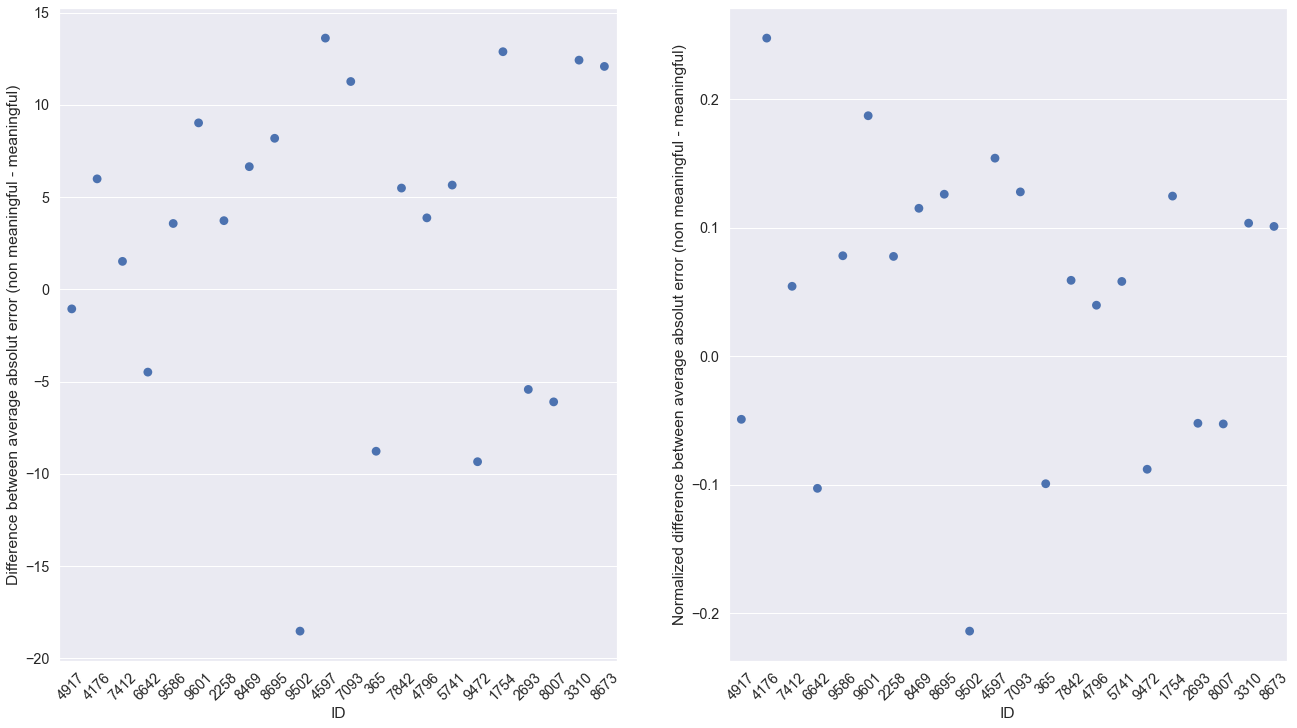

In [6]:
# plotting the subject median absolut pointing error by the factor meaningfulness
fig, axes = plt.subplots(1,2, figsize=(22,12))

sns.pointplot(data=Medianss, x='ID', y='norm', order=absolut_error_sorted.index.values,join=False, ax=axes[1]).set(ylabel='Normalized difference between average absolut error (non meaningful - meaningful)')
sns.pointplot(data=Medianss, x='ID', y='diff', order=absolut_error_sorted.index.values, join=False, ax=axes[0]).set(ylabel='Difference between average absolut error (non meaningful - meaningful)')
axes[0].set_xticklabels(axes[1].get_xticklabels(), rotation=45);
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45);

In [7]:
Medianss.head(27)

Context    ID  NotMeaning    Meaning       diff         sum      norm
0         365   39.825820  48.598202  -8.772383   88.424022 -0.099208
1        1754   58.080679  45.198202  12.882477  103.278882  0.124735
2        2258   25.813233  22.087964   3.725269   47.901197  0.077770
3        2693   49.286651  54.708985  -5.422335  103.995636 -0.052140
4        3310   66.152604  53.726818  12.425786  119.879421  0.103652
5        4176   15.086856   9.095974   5.990882   24.182830  0.247733
6        4597   50.954715  37.334912  13.619804   88.289627  0.154263
7        4796   50.669483  46.792490   3.876994   97.461973  0.039780
8        4917   10.243548  11.300322  -1.056773   21.543870 -0.049052
9        5741   51.339325  45.685073   5.654252   97.024397  0.058277
10       6642   19.567129  24.050887  -4.483758   43.618016 -0.102796
11       7093   49.646154  38.379289  11.266865   88.025442  0.127996
12       7412   14.689040  13.170667   1.518373   27.859707  0.054501
13       7842   49.166869  43.674822   5.492048   92.841691  0.059155
14       8007   54.844661  60.941704  -6.097043  115.786364 -0.052658
15       8469   32.191360  25.538896   6.652464   57.730256  0.115234
16       8673   65.797981  53.713545  12.084436  119.511526  0.101115
17       8695   36.543937  28.354374   8.189562   64.898311  0.126191
18       9472   48.435522  57.775431  -9.339908  106.210953 -0.087937
19       9502   34.023730  52.545861 -18.522131   86.569590 -0.213957
20       9586   24.601070  21.029104   3.571966   45.630174  0.078281
21       9601   28.606275  19.581080   9.025195   48.187355  0.187294

Text(0, 0.5, 'Absolut pointing error in degrees')

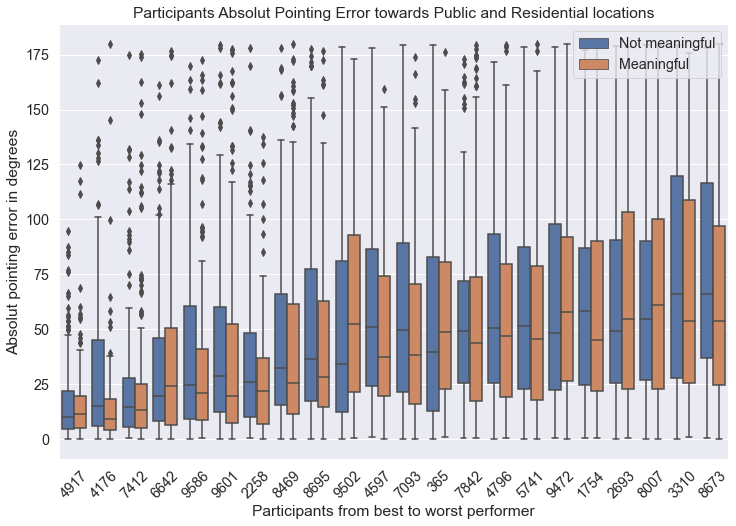

In [8]:
sns.boxplot(x='ID', y='AbsolutError', hue='meaningfulBuilding', data=HumanAf, order=absolut_error_sorted.index.values).set()
plt.legend(loc='upper right')
plt.title('Participants Absolut Pointing Error towards Public and Residential locations')
plt.xlabel('Participants from best to worst performer')
plt.xticks(rotation = 45)
plt.ylabel('Absolut pointing error in degrees')

In [9]:
BuildingNames= pd.read_csv('D:/Documents/Studium/Uni_Osnabrück/WiSe22_23/HumanA/CSVs/BuildingLabels.csv')
HumanAfb = pd.merge(HumanAf,BuildingNames,on='avatarID')
HumanAfb.head()

ID  Alter   Global  Overview  Cardinal  AffiliativeQ_average  item3  \
0  365    37.0     5.6  6.285714       2.5                   5.2    2.0   
1  365    37.0     5.6  6.285714       2.5                   5.2    2.0   
2  365    37.0     5.6  6.285714       2.5                   5.2    2.0   
3  365    37.0     5.6  6.285714       2.5                   5.2    2.0   
4  365    37.0     5.6  6.285714       2.5                   5.2    2.0   

   ContextQ_average  remember_action_likert  remember_standing_likert  ...  \
0               3.5                2.714286                  1.107143  ...   
1               3.5                2.714286                  1.107143  ...   
2               3.5                2.714286                  1.107143  ...   
3               3.5                2.714286                  1.107143  ...   
4               3.5                2.714286                  1.107143  ...   

   PointingTaskStartingLocations  TrialNumber  StartPointID  \
0                           21.0          1.0           1.0   
1                           16.0         78.0           7.0   
2                           13.0         88.0           8.0   
3                           13.0         95.0           8.0   
4                            8.0        131.0          11.0   

   ID_for_StartingPosition  avatarID  AvatarPresenceCategory  Context  \
0                      1.0        46                 Present    False   
1                      6.0        46                 Omitted    False   
2                      4.0        46                 Present    False   
3                     11.0        46                 Omitted    False   
4                     11.0        46                 Omitted    False   

   meaningfulBuilding  ImageName         BuildingName  
0      Not meaningful      46_Sa  (RH)  Undertheocean  
1      Not meaningful    46_SaNo  (RH)  Undertheocean  
2      Not meaningful      46_Sa  (RH)  Undertheocean  
3      Not meaningful    46_SaNo  (RH)  Undertheocean  
4      Not meaningful    46_SaNo  (RH)  Undertheocean  

[5 rows x 29 columns]

In [10]:
BuildingNames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BuildingName  56 non-null     object
 1   avatarID      56 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [11]:
agent_absolut_error_sorted = pd.DataFrame(HumanAfb.groupby('BuildingName')['AbsolutError'].median().sort_values())
agent_absolut_error_sorted.head(56)

AbsolutError
BuildingName                            
(GL) Windmill                   9.612466
(MB) Green store               19.696518
(GL) Castle construction       19.892226
(MB) Basketball Court          20.060524
(MB) Donut shop                20.224189
(MB) Shisha bar                20.640215
(GL) Church                    21.025692
(MB) Cafe                      21.974188
(MB) Pub                       22.212711
(RH)  Undertheocean            23.027467
(GL) Silo                      23.065365
(MB) Construction site         23.369479
(RH) House                     23.698149
(MB) Hardware store            27.251381
(RH) Maus                      28.259915
(MB) Lotto  shop               28.767157
(MB) Sushi restaurant          28.926007
(MB) Grocery store             29.856088
(RH) Purple Bat                29.866072
(RH) Owl                       30.269812
(RH) foxes                     30.393149
(MB) La cantine                30.712611
(MB) Car repair                31.334112
(RH) Bear                      31.888271
(RH) Daisy                     33.522249
(RH) Moto                      34.130930
(MB) Boulangerie               34.135375
(MB) Book store                36.406846
(MB) Fish and ships            36.779615
(RH) Shark                     37.237238
(RH) Cherries                  37.250191
(MB) Sandwich shop             37.315578
(MB) Pizza place               38.951227
(RH) Death sign                38.982127
(MB) Restaurant                39.353732
(MB) Coffee Roasting           39.835845
(MB) Furniture store           40.477274
(RH) Blue Monkey               40.941118
(RH) Deers                     41.288581
(RH) Gorilla                   42.430510
(RH) Street mark               43.739459
(RH) spray bottle              43.908120
(MB) Bicycle shop              44.515404
(MB) Fashion store             45.100521
(RH) Baloons                   45.184216
(RH) Brain                     47.499062
(RH) Tree                      47.731348
(RH) red smoke                 48.504079
(RH) dianthus orange dandy     49.162569
(RH) Nuts                      51.339325
J(RH) aguar                    51.771217
(MB) Wine shop                 52.429969
(RH) Radio                     54.040384
(MB) Patisserie                55.586216
(RH) Bird                      58.777714
(MB) Tapas  bar                71.619194

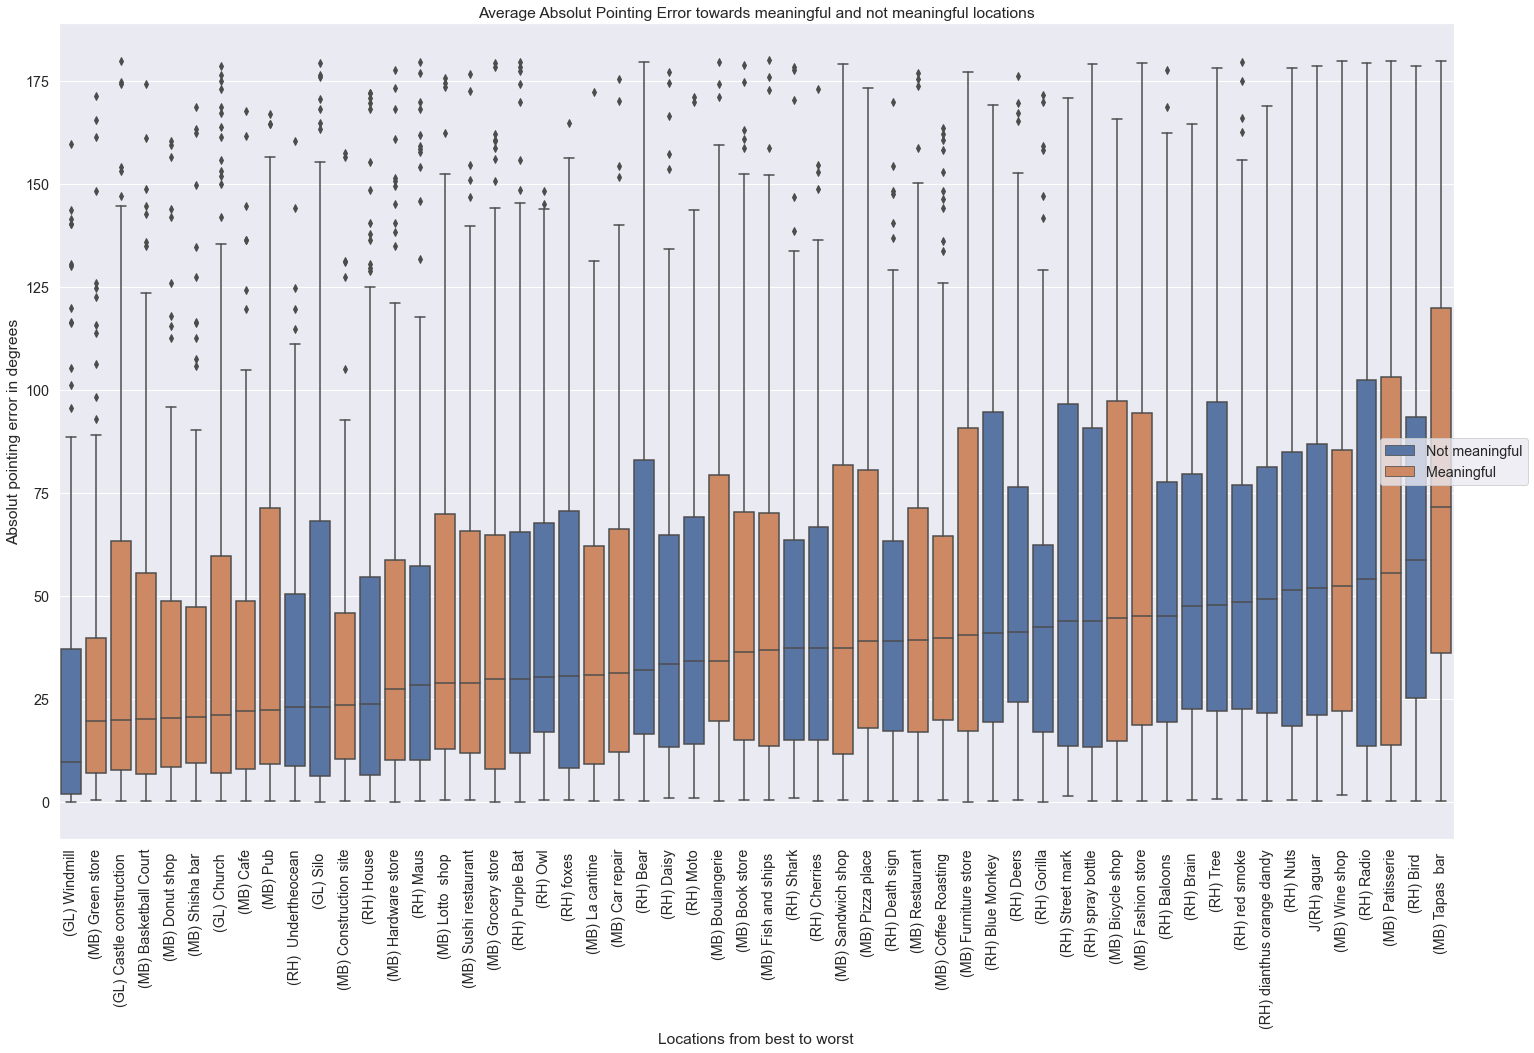

In [12]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x='BuildingName', y='AbsolutError', order=agent_absolut_error_sorted.index.values, hue='meaningfulBuilding', dodge=False, data=HumanAfb)
plt.title('Average Absolut Pointing Error towards meaningful and not meaningful locations')
plt.xlabel('Locations from best to worst')
plt.ylabel('Absolut pointing error in degrees')
plt.xticks(rotation=90);
ax.legend(loc=9, bbox_to_anchor=(1, 0.5))

In [13]:
HumanAfb.to_csv('D:/Documents/Studium/Uni_Osnabrück/WiSe22_23/HumanA/CSVs/buildingnames.csv')

In [14]:
from pingouin import friedman
#Package does Friedman on long data
HumanAfb.head()
shops = friedman(data=HumanAfb, dv='AbsolutError', within='BuildingName', subject='ID')
shops

Source         W  ddof1           Q         p-unc
Friedman  BuildingName  0.151004     55  174.409595  2.436735e-14

In [15]:
import scikit_posthocs as sp
posthoc = sp.posthoc_dunn(HumanAfb, val_col='AbsolutError', group_col='BuildingName', p_adjust = 'bonferroni')
posthoc = posthoc.round(3)

def highlight_sig(s):
    is_sig = s < 0.0019
    return ['background-color: cyan' if v else '' for v in is_sig]

posthoccolor = posthoc.style.apply(highlight_sig)

In [16]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [17]:
display(posthoccolor)

In [18]:
posthoc[posthoc <  0.001].count().sort_values(ascending=False)

(GL) Windmill                 30
(MB) Tapas  bar               24
(RH) Bird                      9
(MB) Green store               6
(MB) Donut shop                3
(RH) Tree                      3
(MB) Construction site         2
(RH) red smoke                 2
(MB) Shisha bar                2
(MB) Fashion store             2
(RH) House                     2
(MB) Basketball Court          2
(MB) Cafe                      2
(MB) Wine shop                 2
(RH)  Undertheocean            2
(RH) Brain                     1
(RH) Cherries                  1
(RH) Daisy                     1
(RH) Death sign                1
(RH) Deers                     1
(RH) Gorilla                   1
(RH) Nuts                      1
(RH) Maus                      1
(RH) Moto                      1
(RH) Owl                       1
(RH) spray bottle              1
(RH) Purple Bat                1
(RH) Radio                     1
(RH) Street mark               1
(RH) dianthus orange dandy     1
(RH) foxes

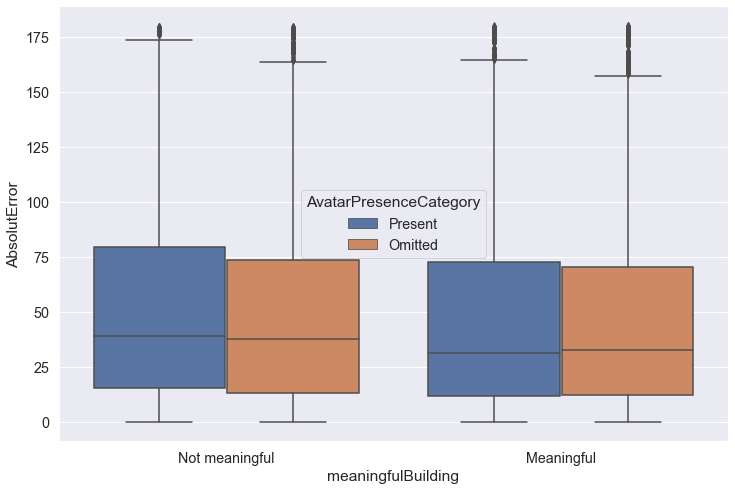

In [19]:
sns.boxplot(y='AbsolutError', x='meaningfulBuilding', hue='AvatarPresenceCategory', data=HumanAf)
axes[0].set_ylabel('Median absolute error in degrees')
axes[0].set_ylim(20, 50)
handles, labels = axes[0].get_legend_handles_labels()
labels = ['Omitted', 'Present']
axes[0].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0., title='Agent Presence')

<AxesSubplot:xlabel='ID', ylabel='AbsolutError'>

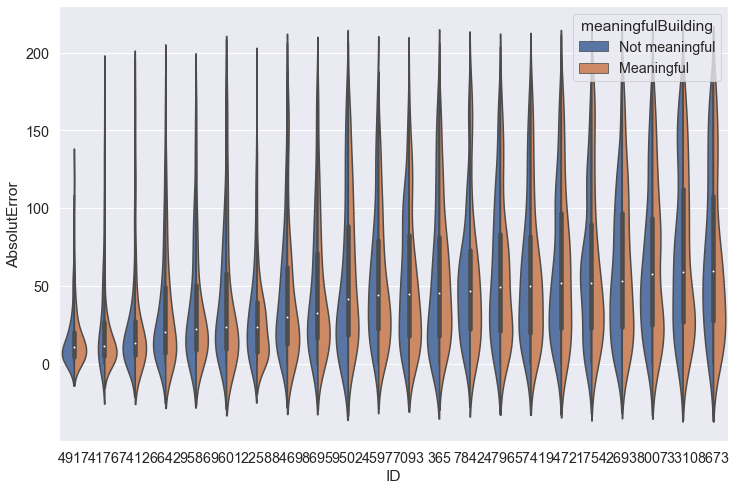

In [20]:
sns.violinplot(y='AbsolutError', hue='meaningfulBuilding', x='ID', split=True,  data=HumanAf, order=absolut_error_sorted.index.values )

In [21]:
import math

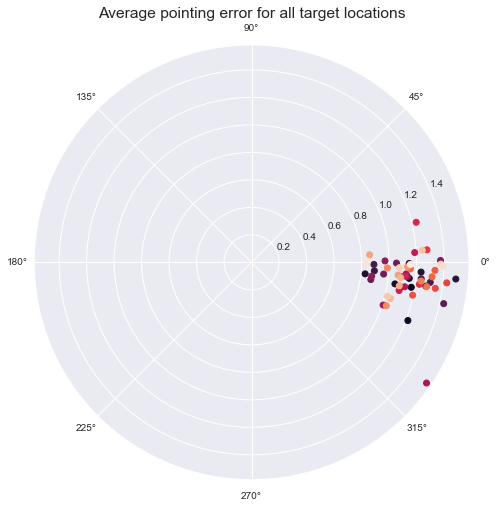

In [22]:
# Create a summary table with the median error for all locations
median_avatar_id = pd.DataFrame(HumanAf.groupby('avatarID')['SignedAngle-+180'].agg(['median','std']))
median_avatar_id.reset_index(inplace=True)
median_avatar_id['MedianRadians'] = [math.radians(median) for median in median_avatar_id['median']]
median_avatar_id['STDRadians'] = [math.radians(std) for std in median_avatar_id['std']]

# plotting the circle
plt.axes(projection='polar')
plt.scatter('MedianRadians', 'STDRadians', data=median_avatar_id, c=median_avatar_id.index.values)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average pointing error for all target locations')
# display the Polar plot
plt.show()

## Response Time

In [23]:
RT_sorted = pd.DataFrame(HumanAf.groupby('ID')['RT'].median().sort_values())
RT_sorted.head()

RT
ID            
7842  3.467534
7093  3.694836
9472  3.959314
4597  4.453583
2258  4.494768

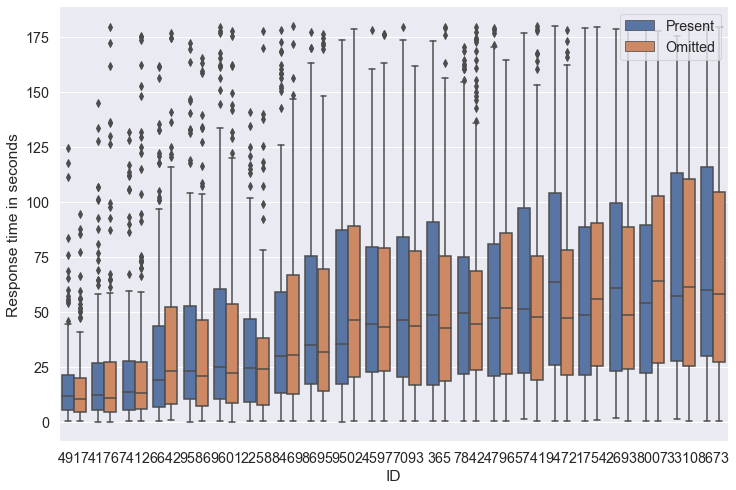

In [24]:
sns.boxplot(x='ID', y='AbsolutError', hue='AvatarPresenceCategory', data=HumanAf, order=absolut_error_sorted.index.values)
plt.ylabel('Response time in seconds')
plt.legend(loc='upper right')

## Distance

Text(0, 0.5, 'Absolut pointing error to target in degrees ')

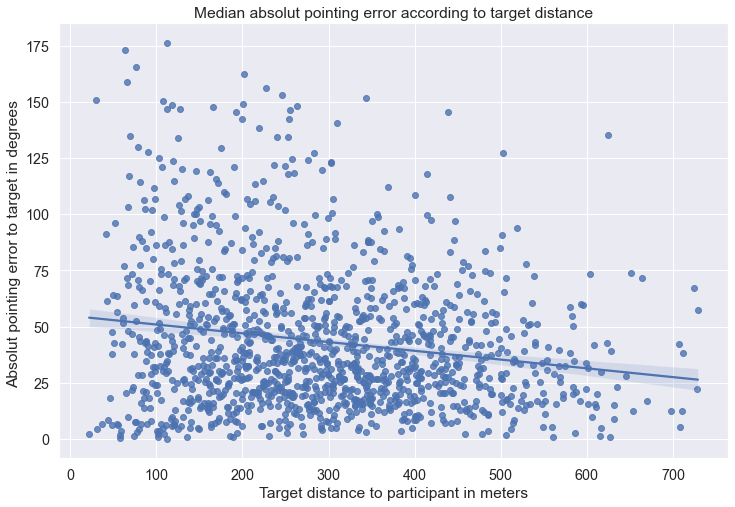

In [25]:
rounded_distances = pd.DataFrame(HumanAf.groupby(HumanAf['DistanceToParticipant'].apply(lambda x: round(x, 1)))["AbsolutError"].median())
rounded_distances.reset_index(inplace=True)
sns.regplot(x="DistanceToParticipant", y="AbsolutError", data=rounded_distances)
plt.title('Median absolut pointing error according to target distance')
plt.xlabel('Target distance to participant in meters')
plt.ylabel('Absolut pointing error to target in degrees ')

c:\Users\Kaya\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\Kaya\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


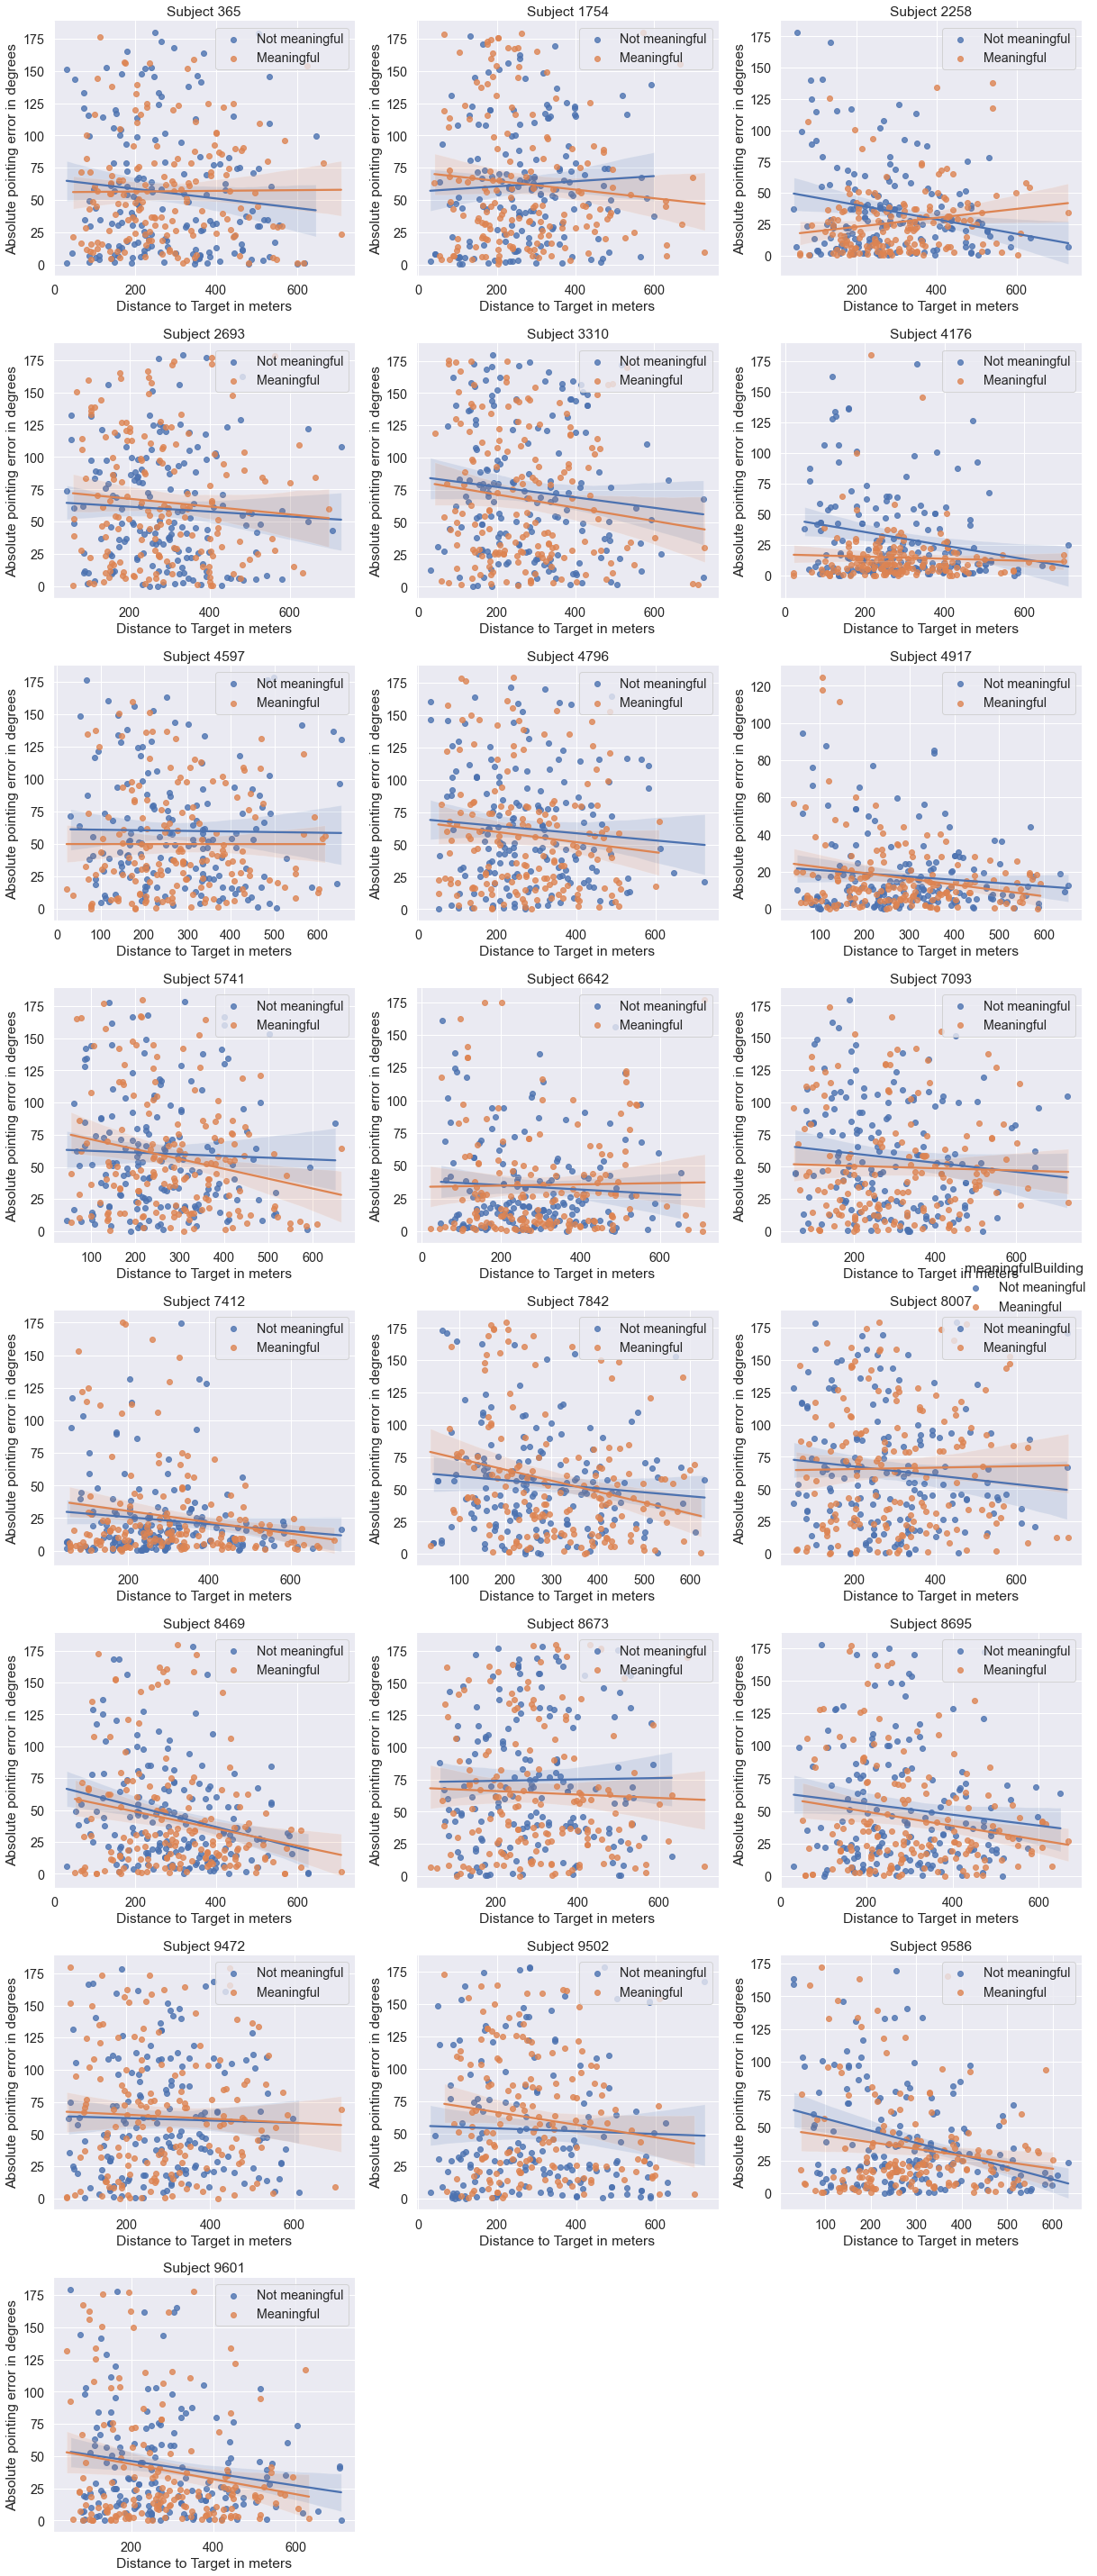

In [26]:
g = sns.lmplot(x="DistanceToParticipant", y="AbsolutError", data=HumanAf, hue='meaningfulBuilding',col="ID", col_wrap=3, sharex=False, sharey=False)
g.set_titles("Subject {col_name}")

for ax in g.axes.ravel():
    ax.legend(loc='upper right')
    ax.set_xlabel("Distance to Target in meters")
    ax.set_ylabel('Absolute pointing error in degrees')

plt.tight_layout()

c:\Users\Kaya\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\Kaya\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


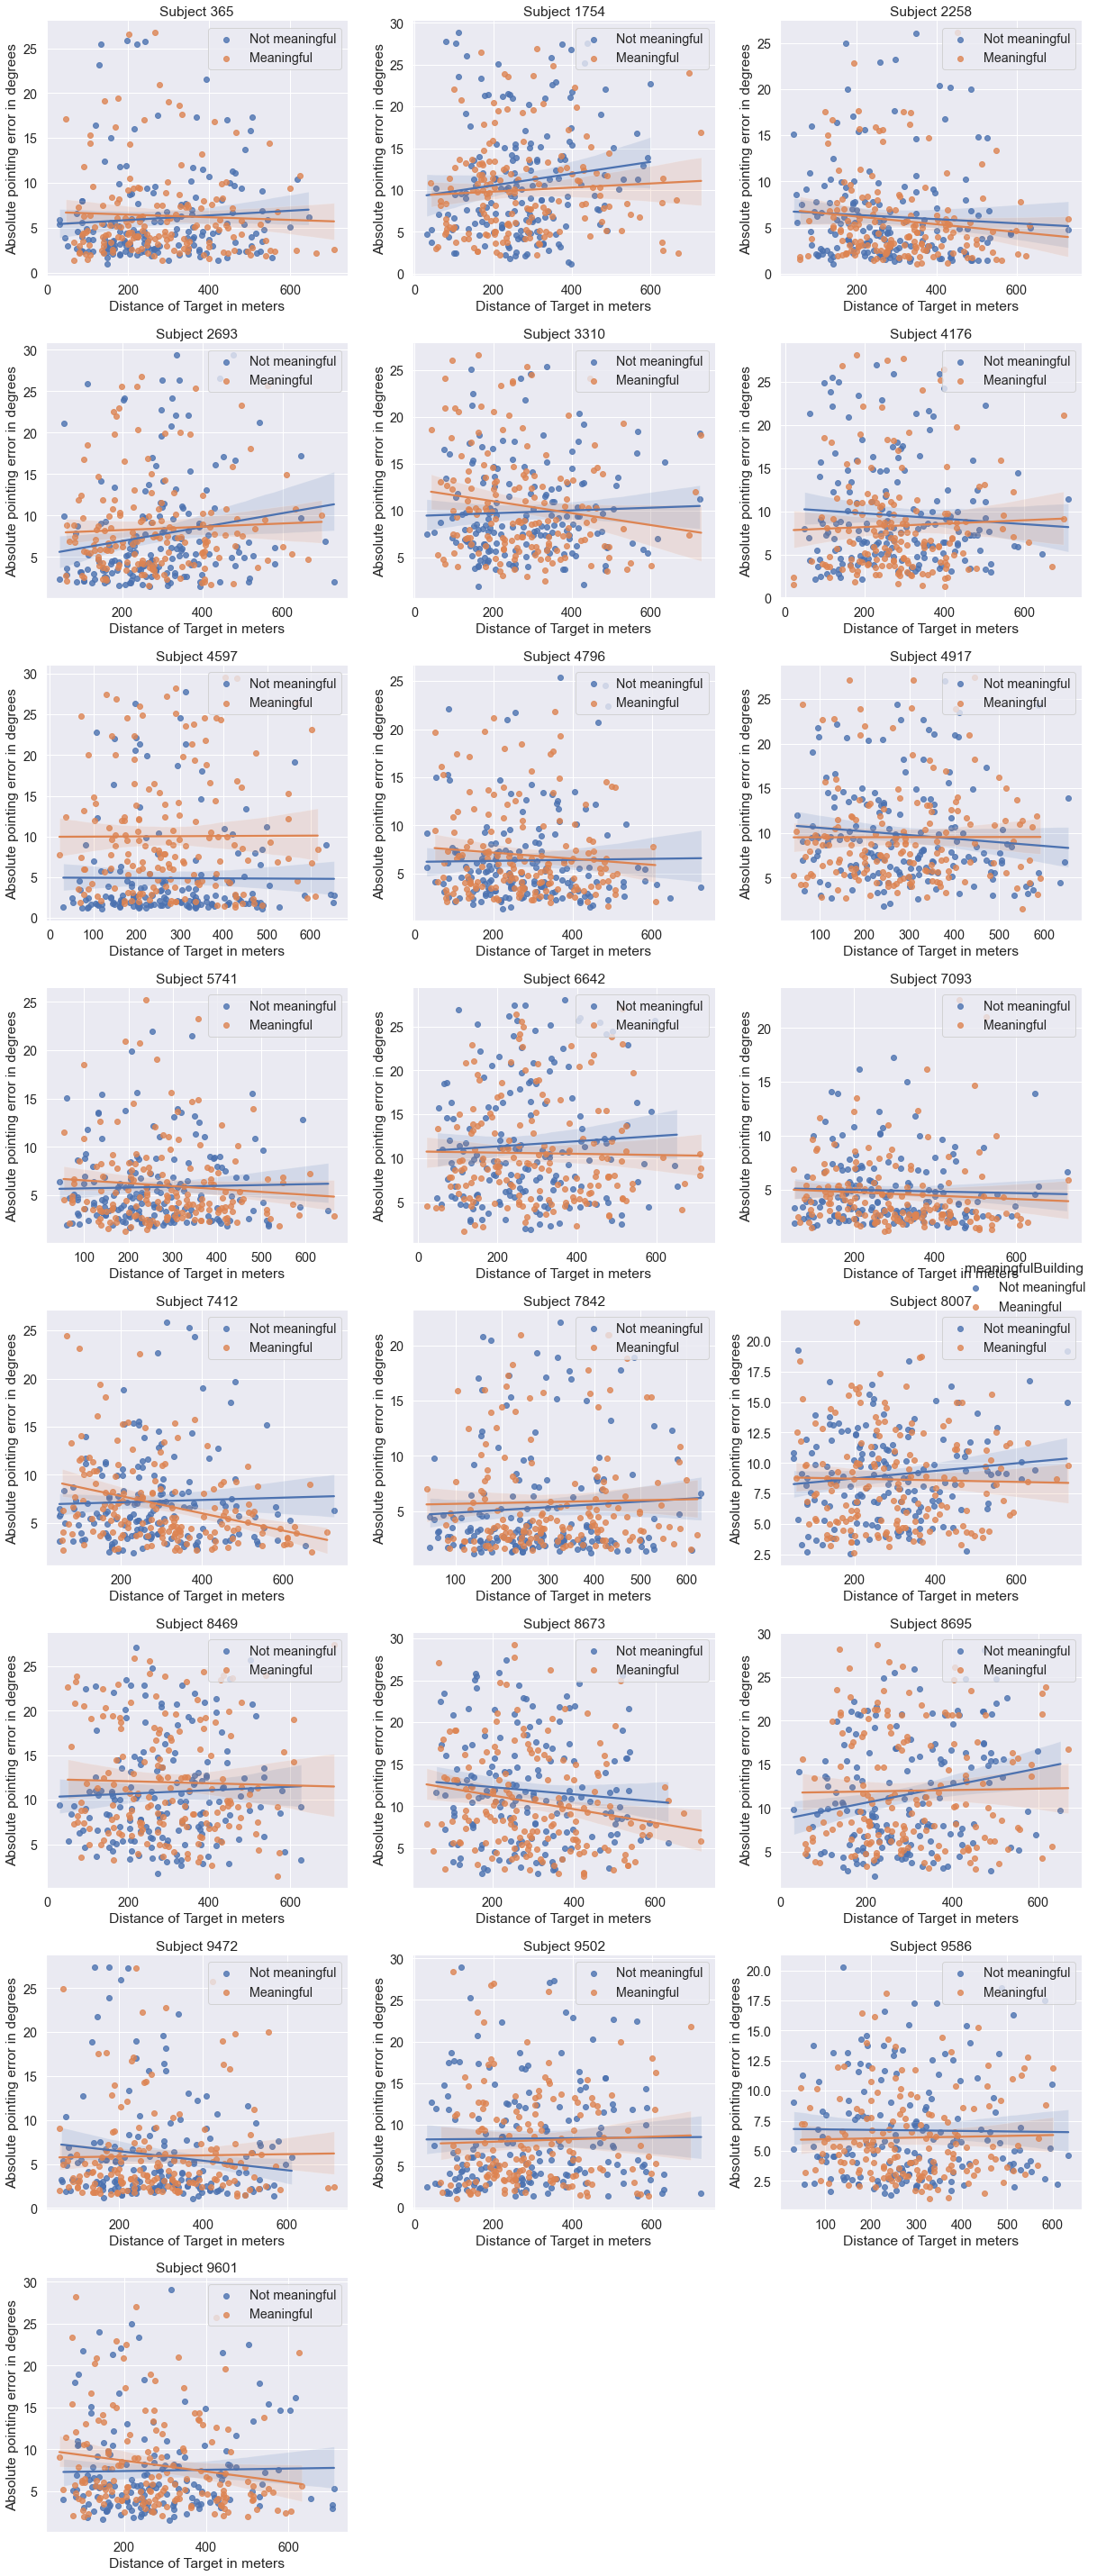

In [27]:
g = sns.lmplot(x="DistanceToParticipant", y="RT", data=HumanAf, hue='meaningfulBuilding',col="ID", col_wrap=3, sharex=False, sharey=False)
g.set_titles("Subject {col_name}")

for ax in g.axes.ravel():
    ax.legend(loc='upper right')
    ax.set_xlabel("Distance of Target in meters")
    ax.set_ylabel('Absolute pointing error in degrees')

plt.tight_layout()

## Order effects

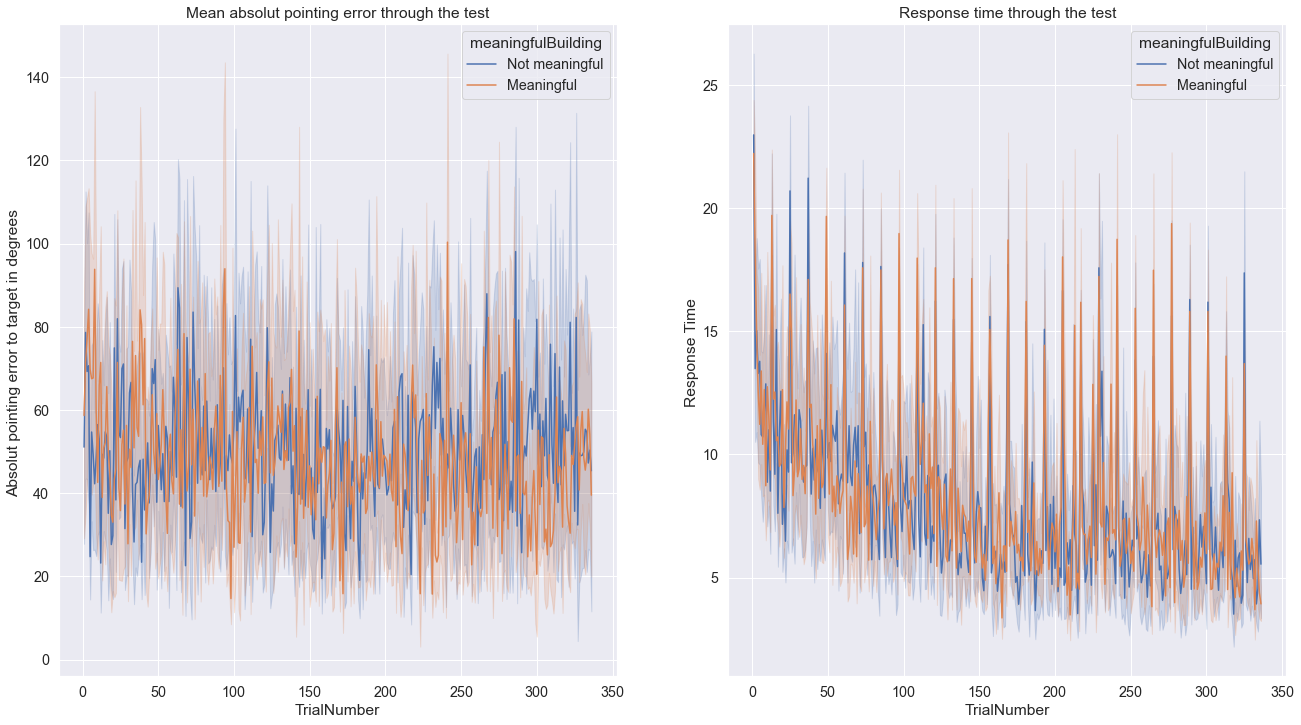

In [28]:
fig, axes = plt.subplots(1,2, figsize=(22,12))
sns.lineplot(data=HumanAf, x="TrialNumber", y="AbsolutError", hue='meaningfulBuilding' , estimator='mean', ci=95, ax=axes[0])
sns.lineplot(data=HumanAf, x="TrialNumber", y="RT", hue='meaningfulBuilding' , estimator='mean', ci=95, ax=axes[1])
axes[0].set_title('Mean absolut pointing error through the test')
axes[1].set_title('Response time through the test')
axes[0].set_ylabel('Absolut pointing error to target in degrees ')
axes[1].set_ylabel('Response Time ')
ax.legend(loc='upper right')

(5.0, 14.0)

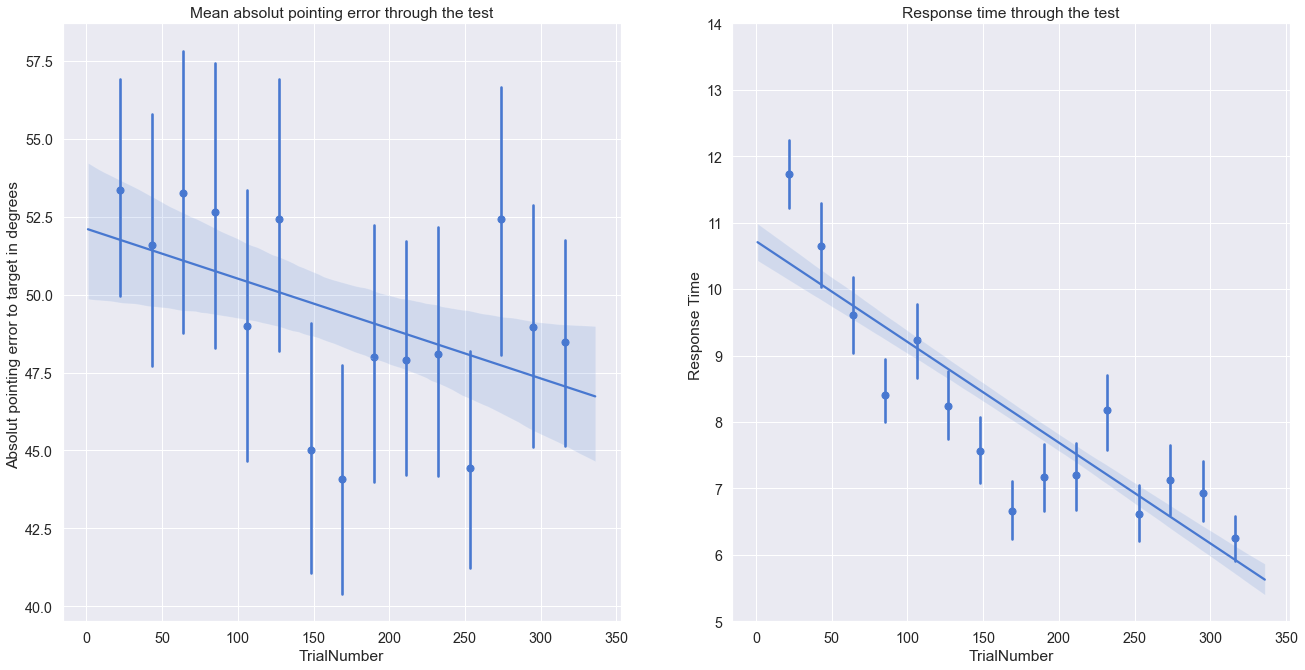

In [50]:
# TODO: adjust ylim 6 to 13
fig, axes = plt.subplots(1,2, figsize=(22,11))
sns.regplot(data=HumanAf, x="TrialNumber", y="AbsolutError", x_bins=15, ax=axes[0])
sns.regplot(data=HumanAf, x="TrialNumber", y="RT", x_bins=15, ax=axes[1])
axes[0].set_title('Mean absolut pointing error through the test')
axes[1].set_title('Response time through the test')
axes[0].set_ylabel('Absolut pointing error to target in degrees ')
axes[1].set_ylabel('Response Time ')
axes[1].set_ylim(5,14)

c:\Users\Kaya\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\Kaya\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


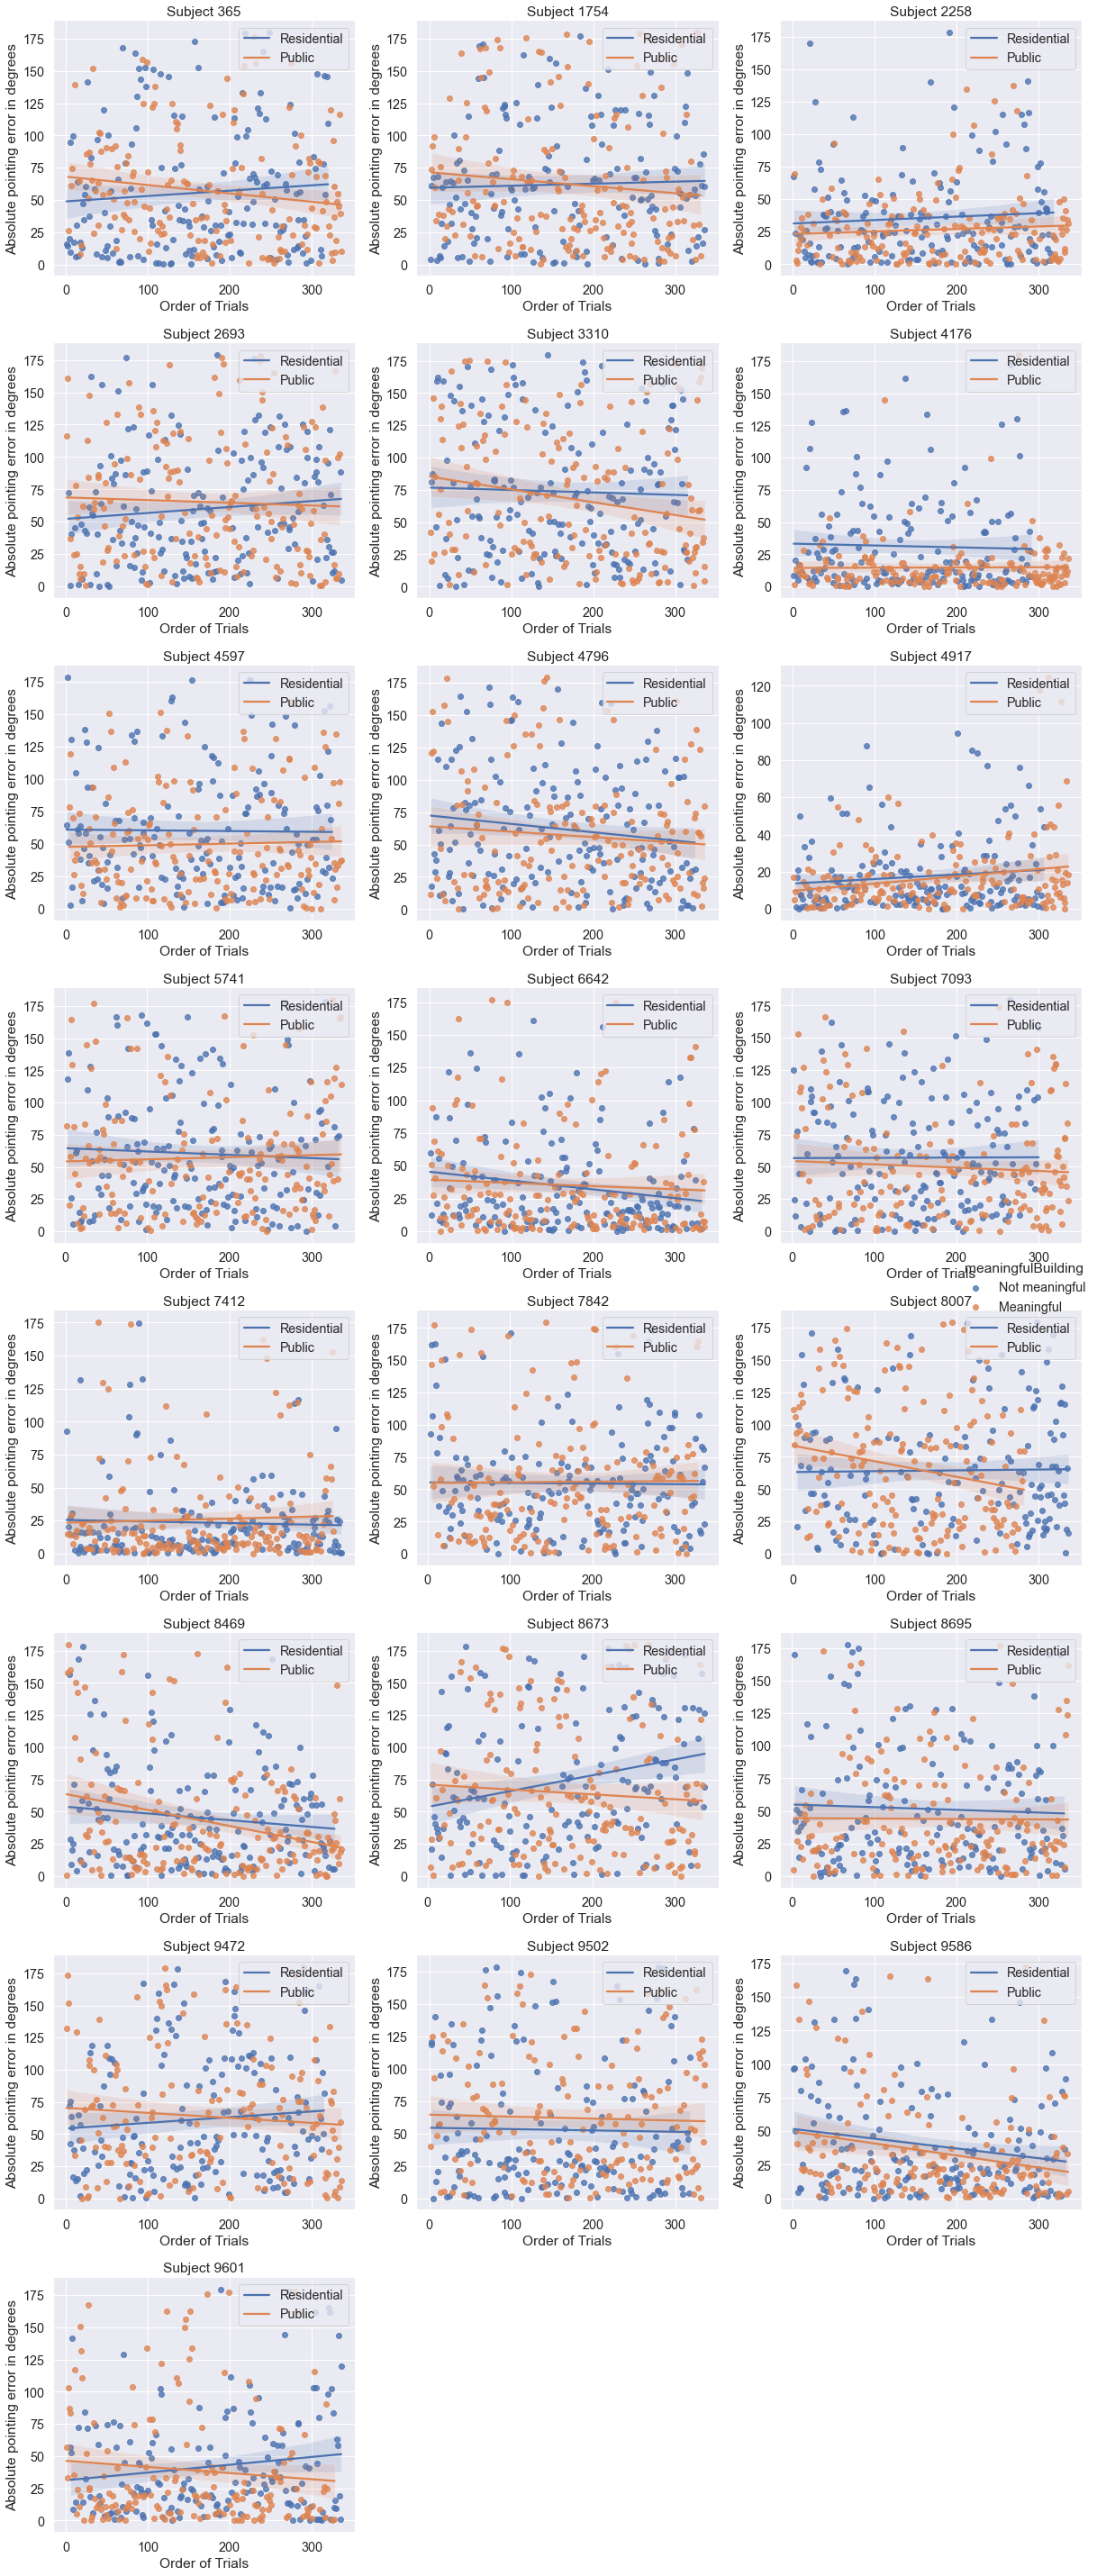

In [30]:
g = sns.lmplot(x="TrialNumber", y="AbsolutError", data=HumanAf, hue='meaningfulBuilding',col="ID", col_wrap=3, sharex=False, sharey=False)
g.set_titles("Subject {col_name}")

for ax in g.axes.ravel():
    labels = ['Residential', 'Public']
    ax.legend(labels, loc='upper right')
    ax.set_xlabel("Order of Trials")
    ax.set_ylabel('Absolute pointing error in degrees')

plt.tight_layout()

c:\Users\Kaya\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\Kaya\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


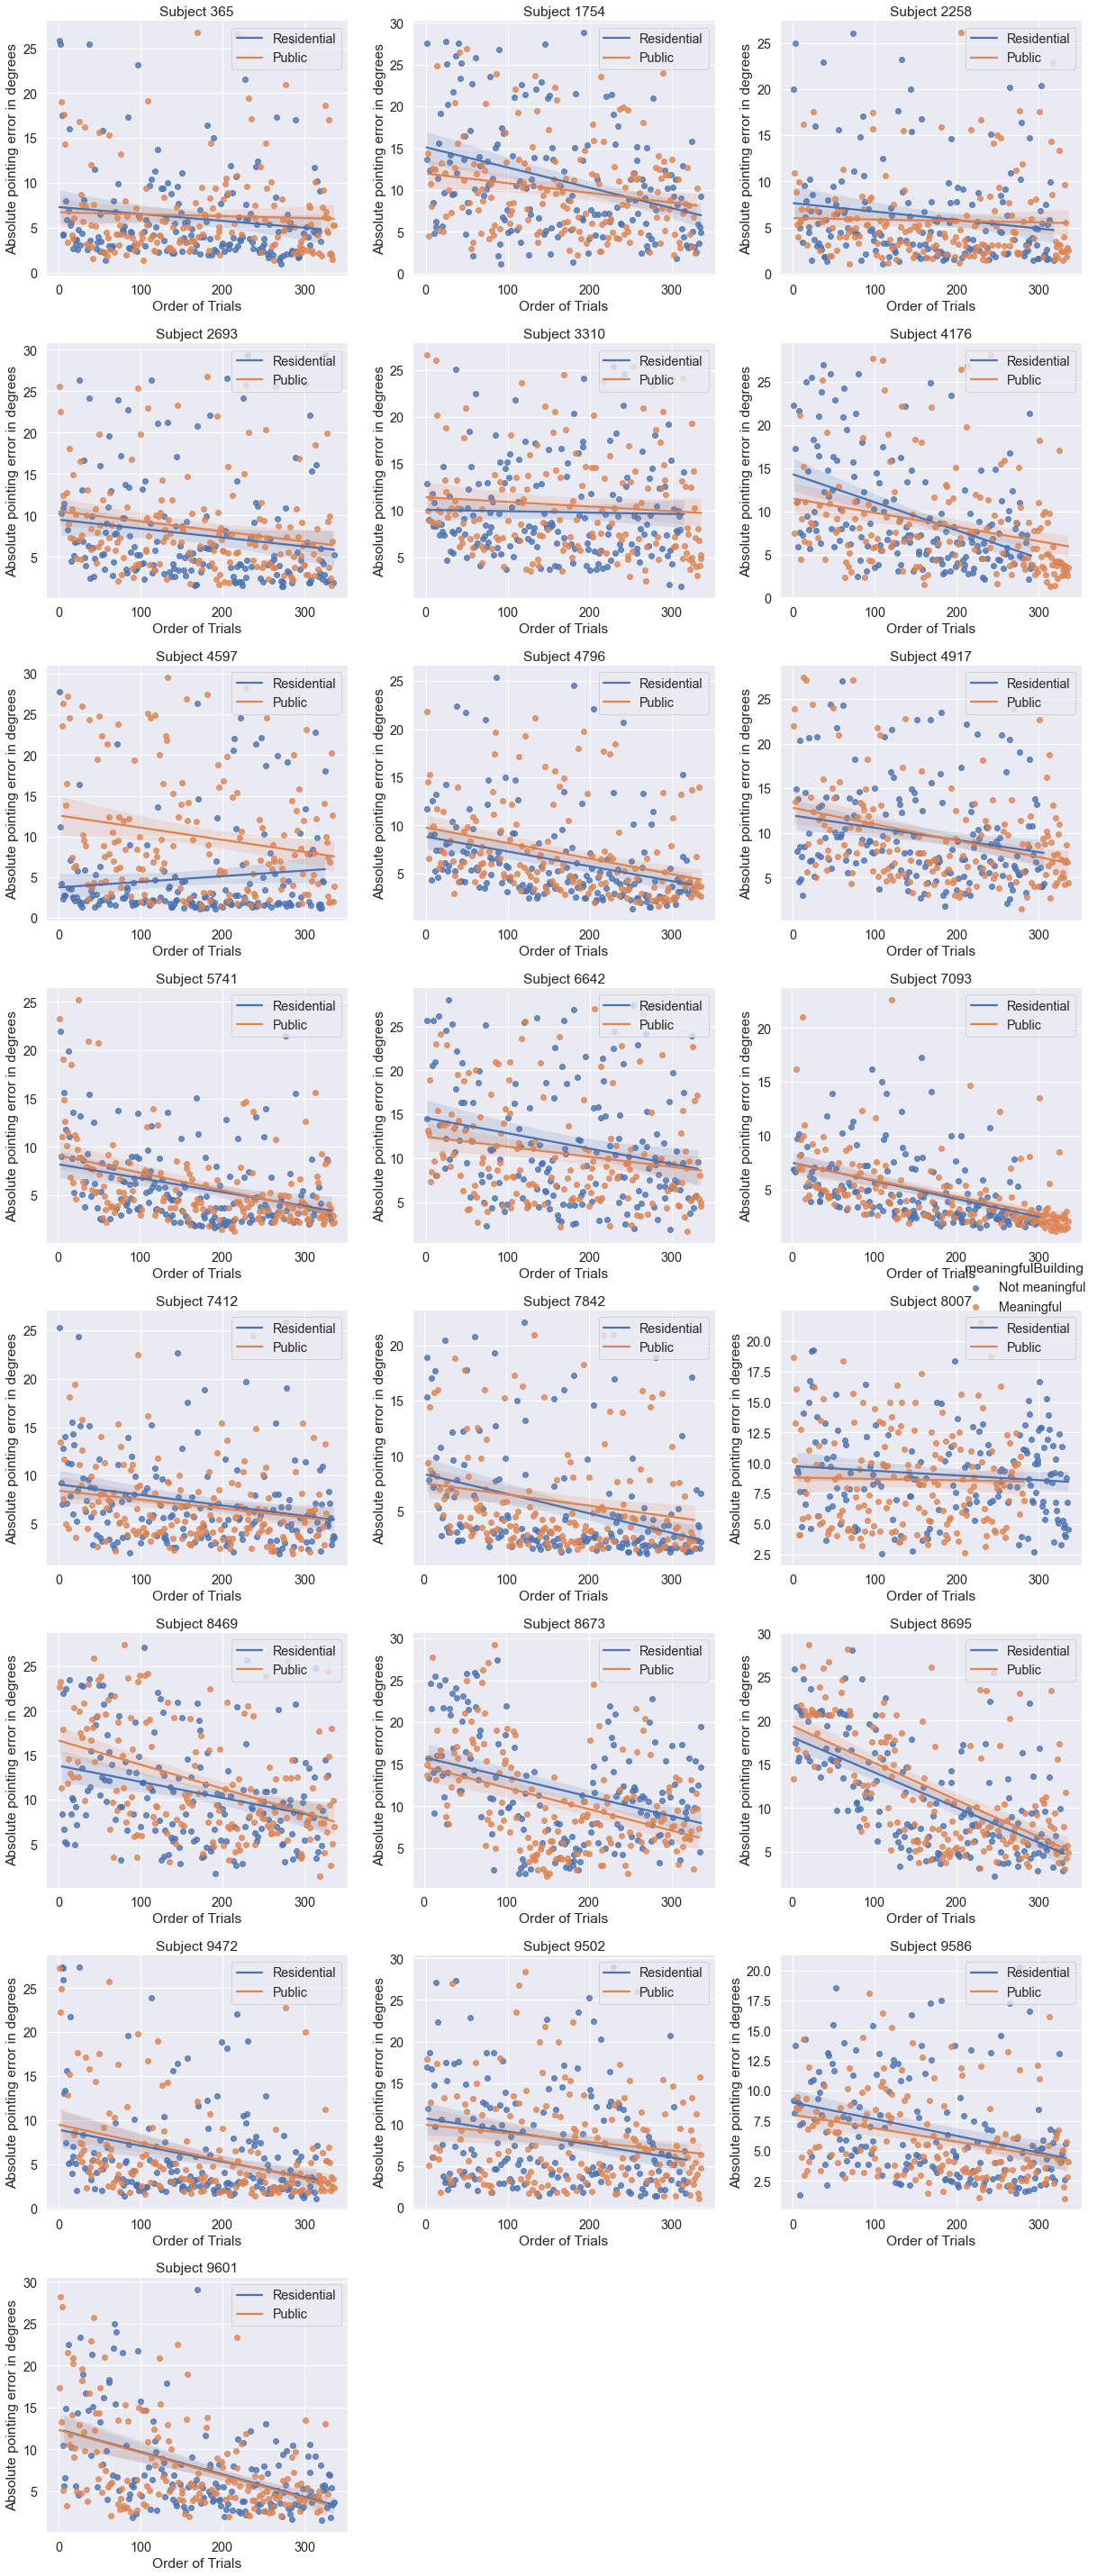

In [31]:
g = sns.lmplot(x="TrialNumber", y="RT", data=HumanAf, hue='meaningfulBuilding',col="ID", col_wrap=3, sharex=False, sharey=False)
g.set_titles("Subject {col_name}")

for ax in g.axes.ravel():
    labels = ['Residential', 'Public']
    ax.legend(labels, loc='upper right')
    ax.set_xlabel("Order of Trials")
    ax.set_ylabel('Absolute pointing error in degrees')

plt.tight_layout()

In [32]:
import numpy as np

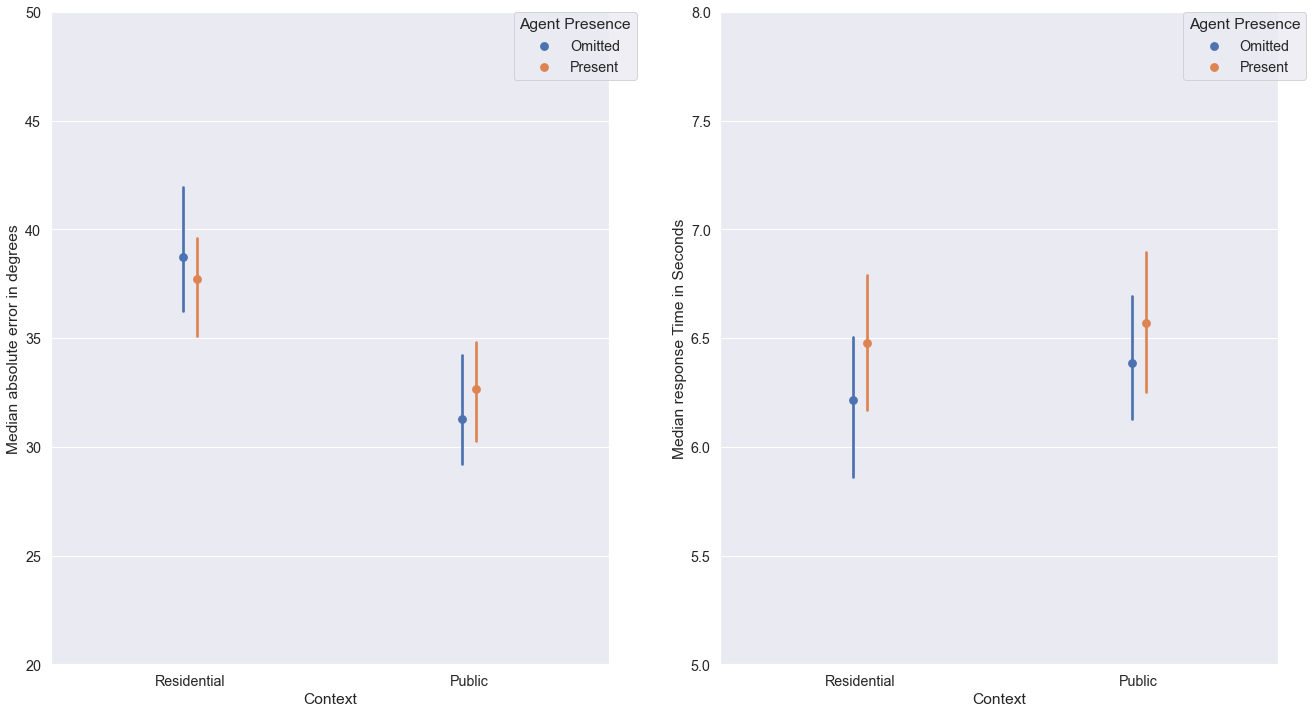

In [33]:
fig, axes = plt.subplots(1,2, figsize=(22,12))

sns.pointplot(x='Context', y='AbsolutError', hue='AvatarPresenceCategory', dodge=True, data=HumanAf,
              ci=95, estimator=np.median, join=False, ax=axes[0])

axes[0].set_xticklabels(['Residential', 'Public'])
axes[0].set_ylabel('Median absolute error in degrees')
axes[0].set_ylim(20, 50)
handles, labels = axes[0].get_legend_handles_labels()
labels = ['Omitted', 'Present']
axes[0].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0., title='Agent Presence')

sns.pointplot(x='Context', y='RT',hue='AvatarPresenceCategory', dodge=True, data=HumanAf,
              ci=95, estimator=np.median,join=False,  ax=axes[1])
axes[1].set_xticklabels(['Residential', 'Public'])
axes[1].set_ylabel('Median response Time in Seconds')
axes[1].set_ylim(5, 8)
axes[1].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0., title='Agent Presence')

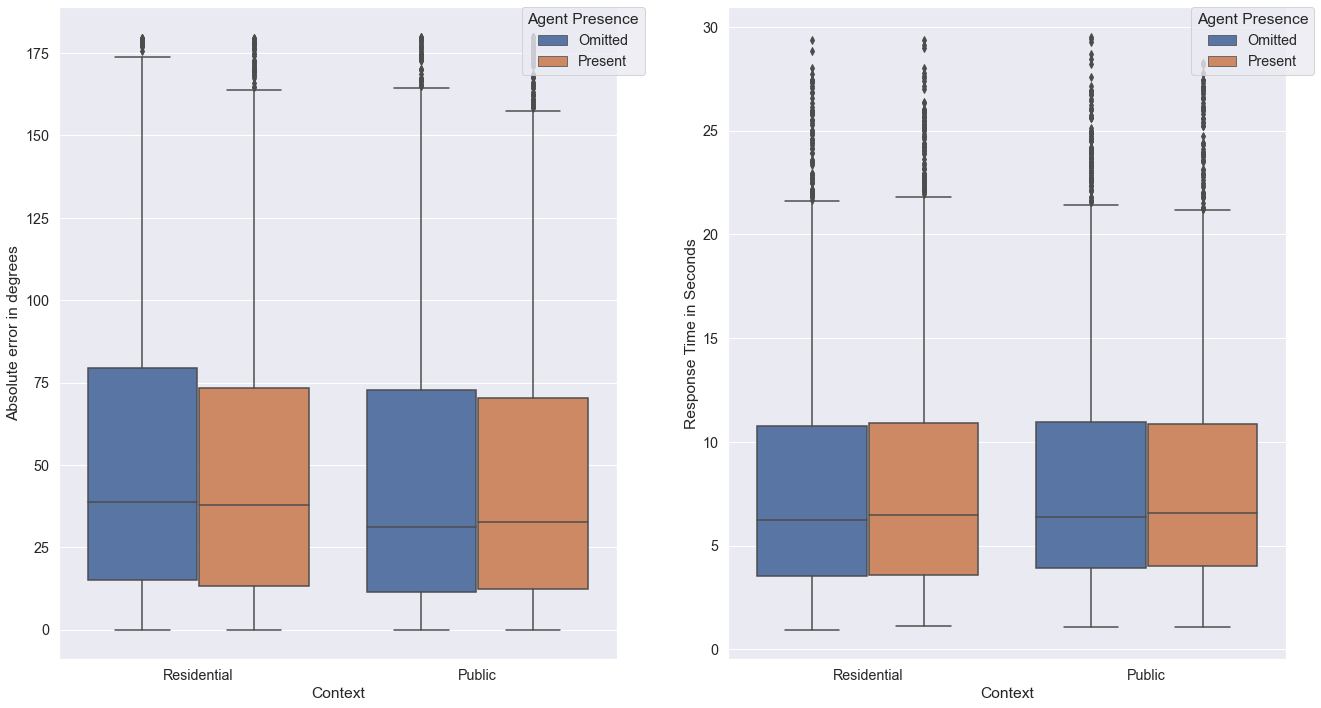

In [34]:
fig, axes = plt.subplots(1,2, figsize=(22,12))

sns.boxplot(x='Context', y='AbsolutError', hue='AvatarPresenceCategory',  data=HumanAf,ax=axes[0])

axes[0].set_xticklabels(['Residential', 'Public'])
axes[0].set_ylabel('Absolute error in degrees')
handles, labels = axes[0].get_legend_handles_labels()
labels = ['Omitted', 'Present']
axes[0].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0., title='Agent Presence')

sns.boxplot(x='Context', y='RT',hue='AvatarPresenceCategory', dodge=True, data=HumanAf, ax=axes[1])
axes[1].set_xticklabels(['Residential', 'Public'])
axes[1].set_ylabel('Response Time in Seconds')
axes[1].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0., title='Agent Presence')

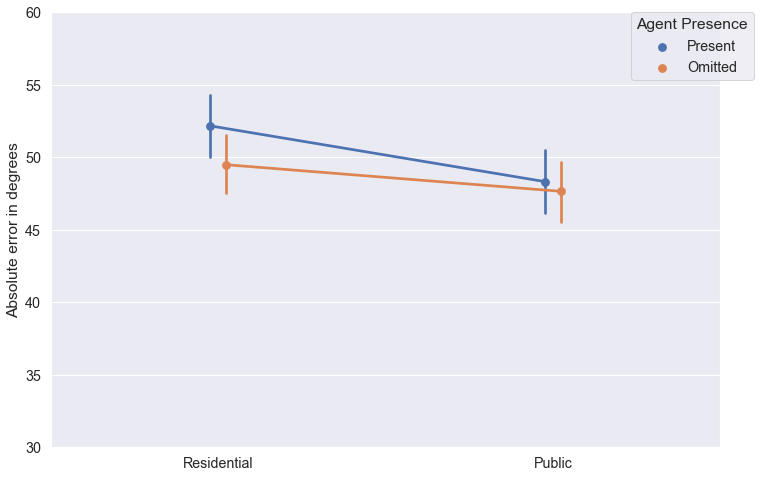

In [35]:
g = sns.pointplot(x='Context', y='AbsolutError', hue='AvatarPresenceCategory', dodge=True, data=HumanAf, ci=95)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0., title='Agent Presence')
g.set_xticklabels(['Residential', 'Public'])
g.set_ylabel('Absolute error in degrees')
g.set_xlabel('')
g.set_ylim(30, 60);

In [36]:
HumanAf.groupby(['Context','AvatarPresenceCategory'])['RT'].agg([np.mean,np.median,np.std])

mean    median       std
Context AvatarPresenceCategory                              
False   Omitted                 8.155159  6.476765  5.892550
        Present                 8.037586  6.215684  5.958197
True    Omitted                 8.274654  6.569518  5.730035
        Present                 8.187180  6.387485  5.789353

(6.0, 10.0)

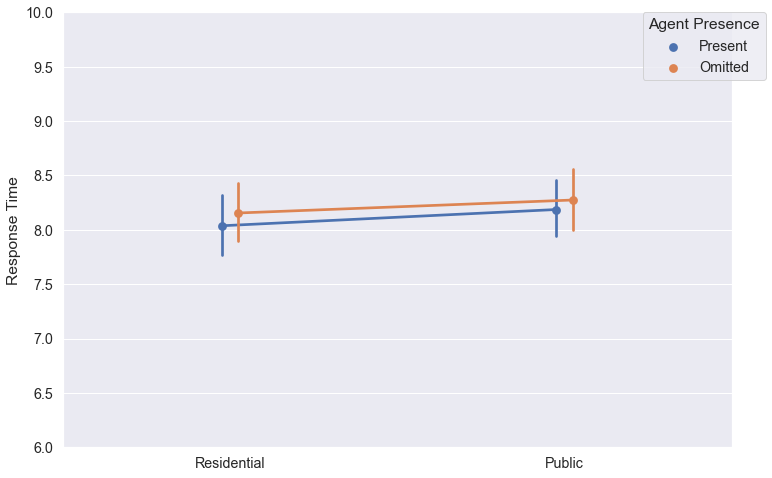

In [37]:
g = sns.pointplot(x='Context', y='RT', hue='AvatarPresenceCategory', dodge=True, data=HumanAf, ci=95)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0., title='Agent Presence')
g.set_xticklabels(['Residential', 'Public'])
g.set_ylabel('Response Time')
g.set_xlabel('')
g.set_ylim(6, 10)

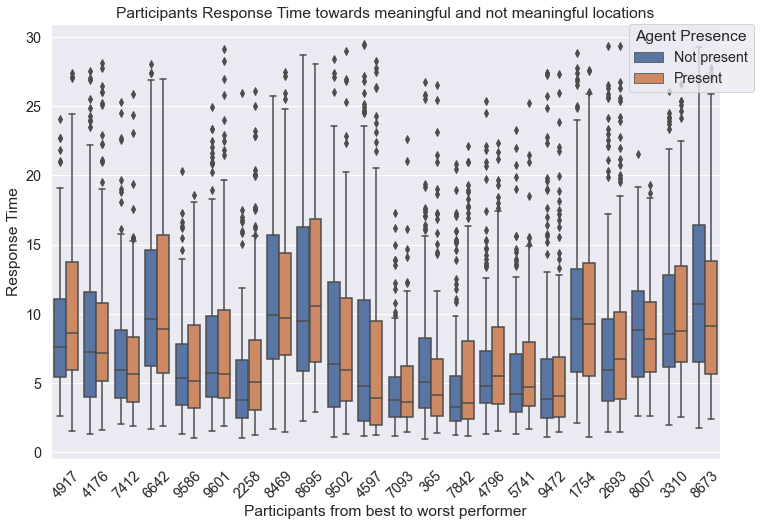

In [38]:
ax = sns.boxplot(x='ID', y='RT', hue='AvatarPresenceCategory', data=HumanAf, order=absolut_error_sorted.index.values)
plt.title('Participants Response Time towards meaningful and not meaningful locations')
plt.xlabel('Participants from best to worst performer')
plt.xticks(rotation = 45)
plt.ylabel('Response Time')
handles, labels = ax.get_legend_handles_labels()
labels = ['Not present', 'Present']
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0., title='Agent Presence')

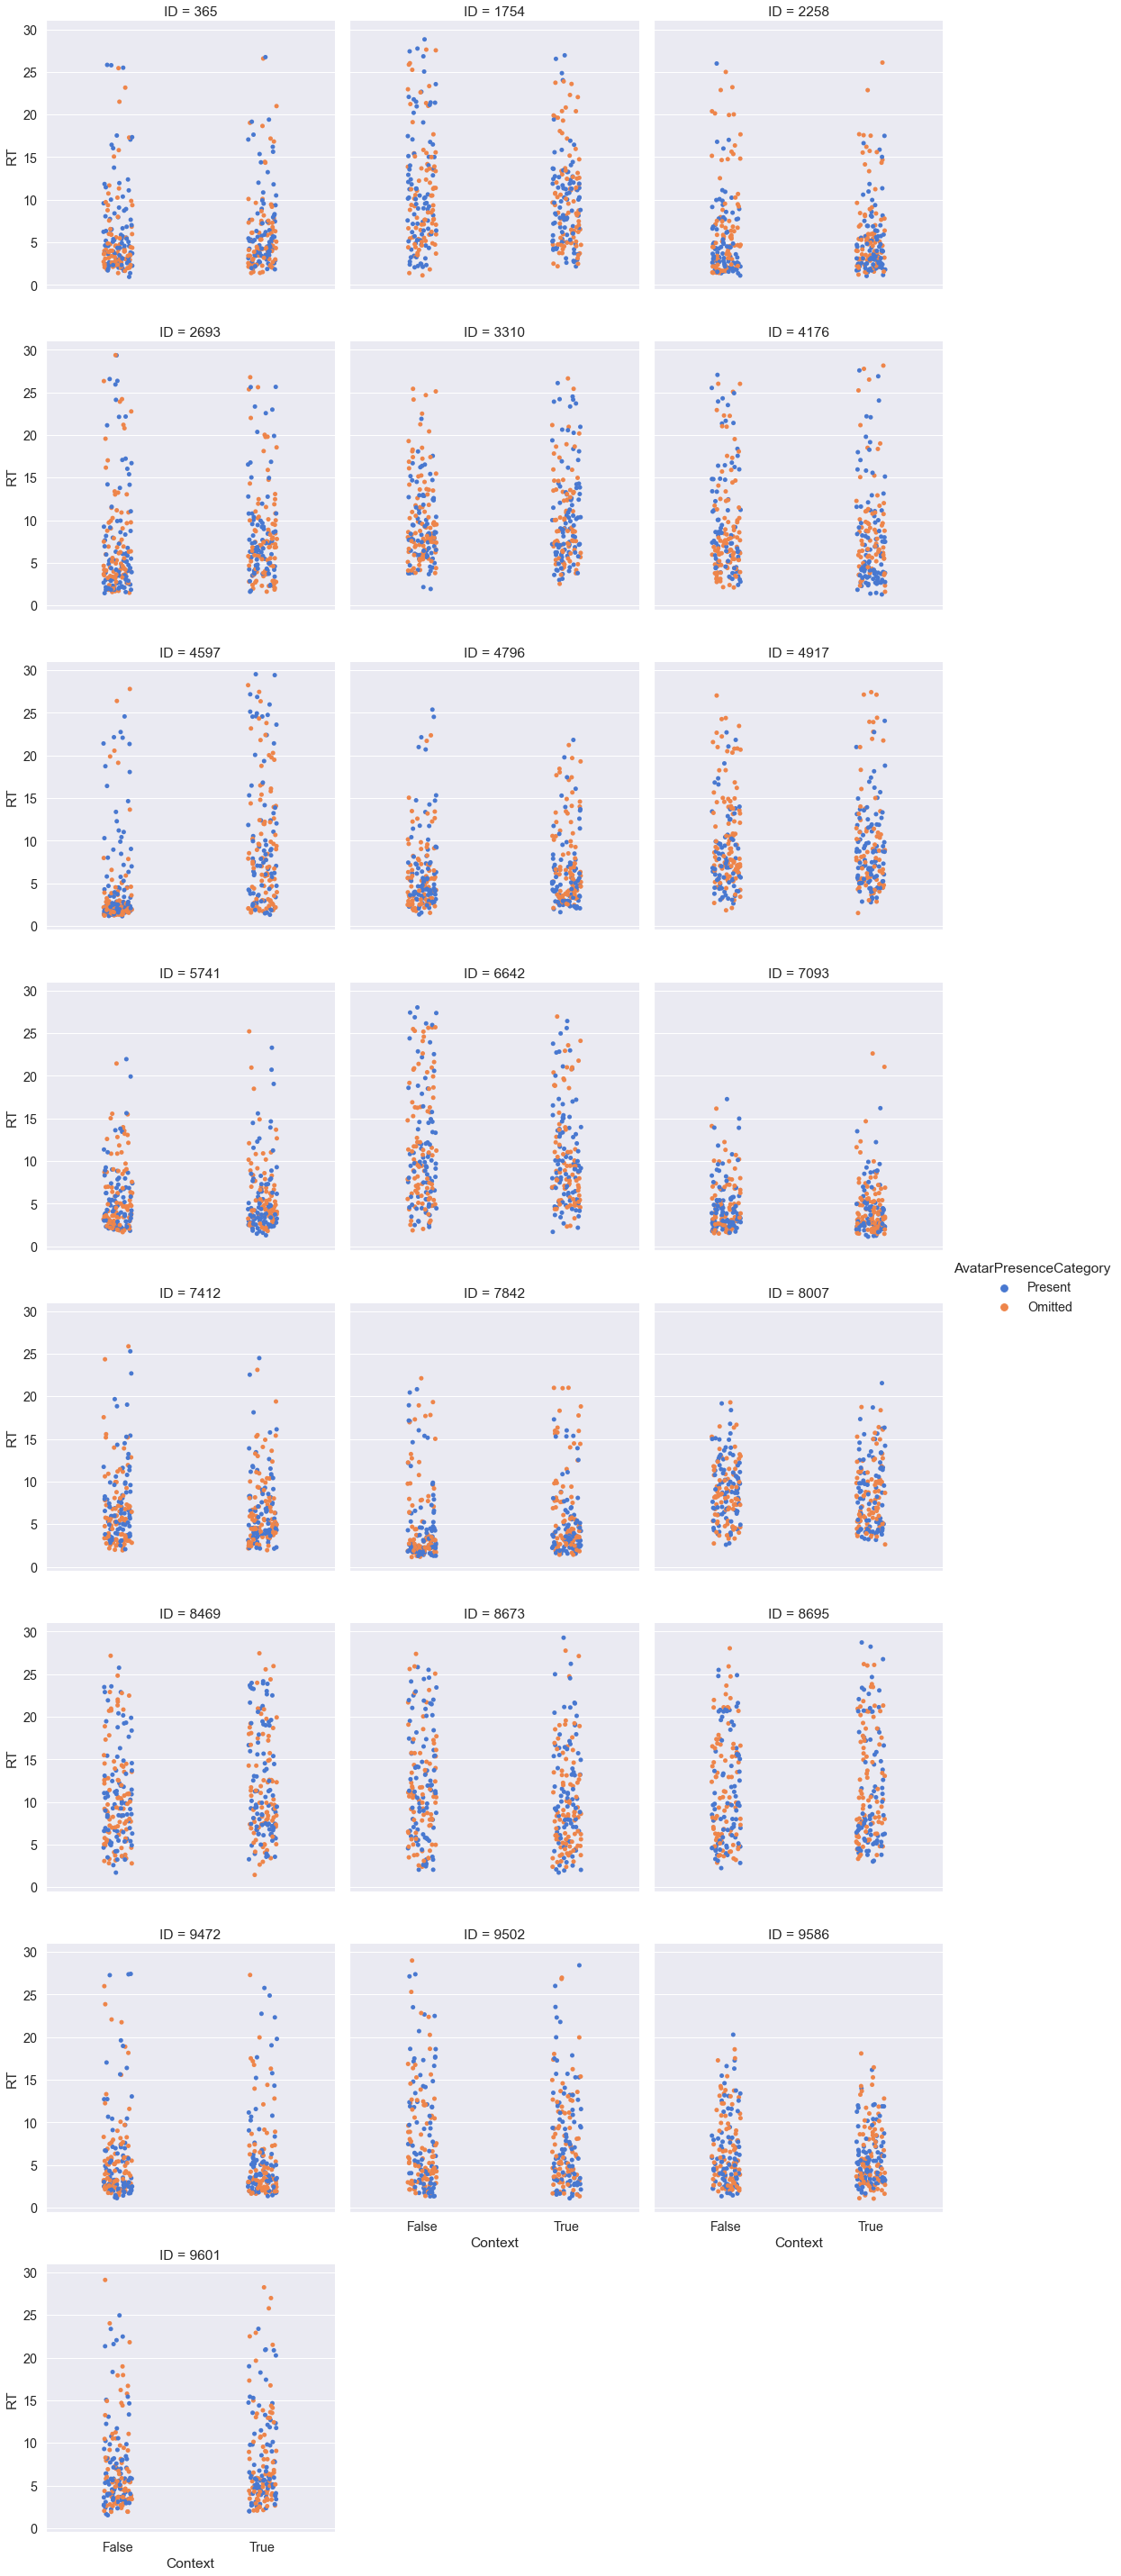

In [39]:
sns.set_palette('muted')
g = sns.catplot(x='Context', y='RT', hue='AvatarPresenceCategory', dodge=False, data=HumanAf, ci=95, col="ID", col_wrap=3,)

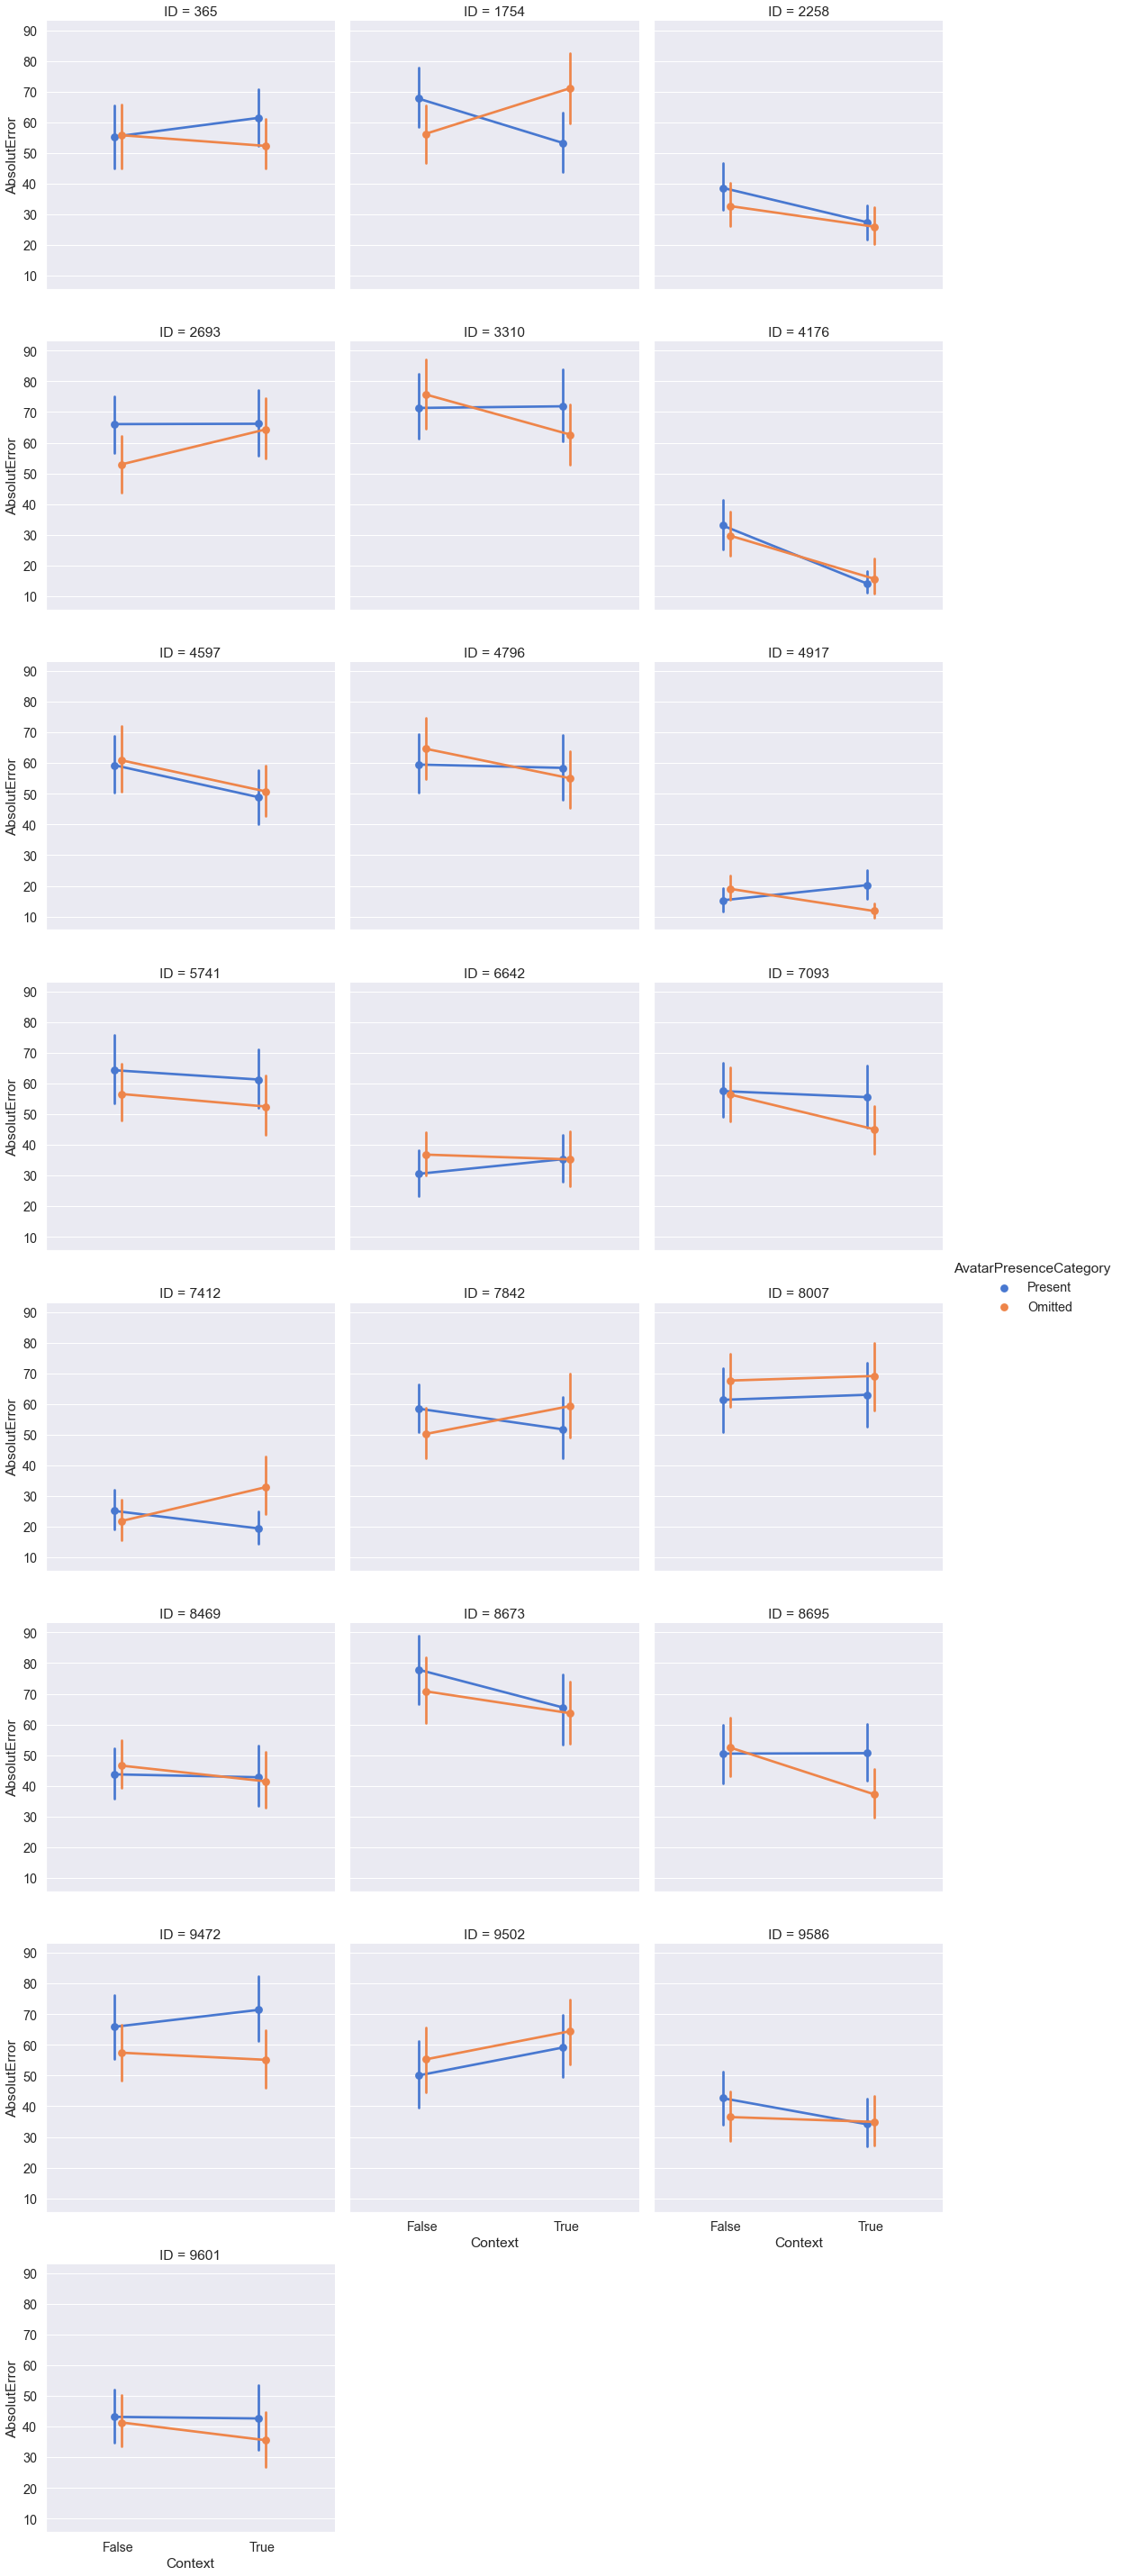

In [40]:
g = sns.catplot(x='Context', y='AbsolutError', hue='AvatarPresenceCategory', dodge=True, data=HumanAf, ci=95, col="ID", col_wrap=3,
                kind="point");

c:\Users\Kaya\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\Kaya\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


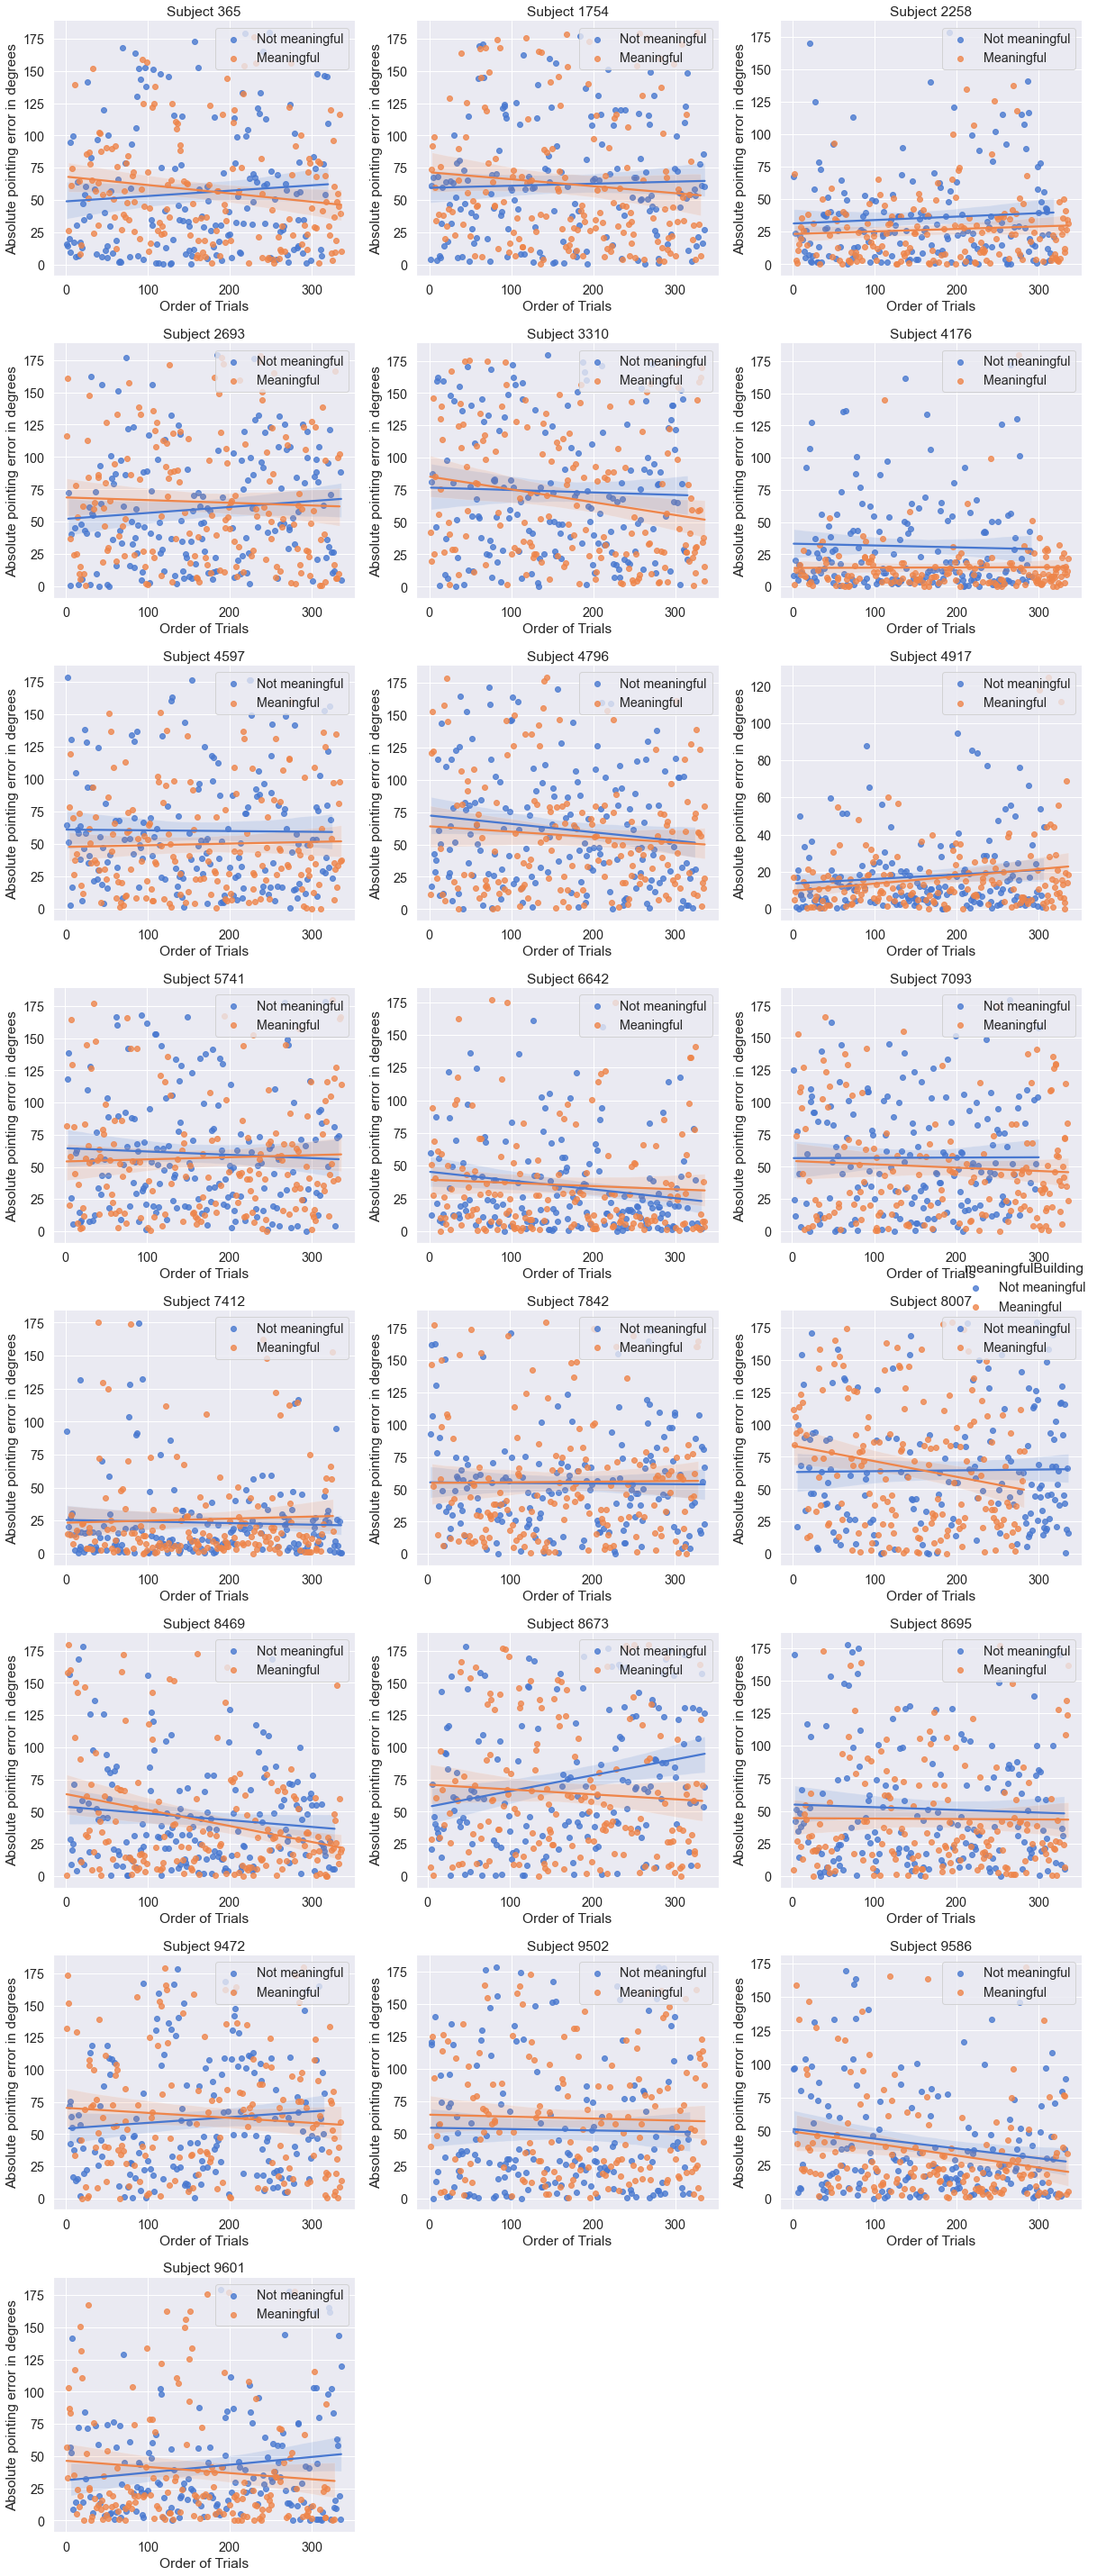

In [41]:
g = sns.lmplot(x="TrialNumber", y="AbsolutError", data=HumanAf, hue='meaningfulBuilding',col="ID", col_wrap=3, sharex=False, sharey=False)
g.set_titles("Subject {col_name}")

for ax in g.axes.ravel():
    ax.legend(loc='upper right')
    ax.set_xlabel("Order of Trials")
    ax.set_ylabel('Absolute pointing error in degrees')

plt.tight_layout()

#FRS

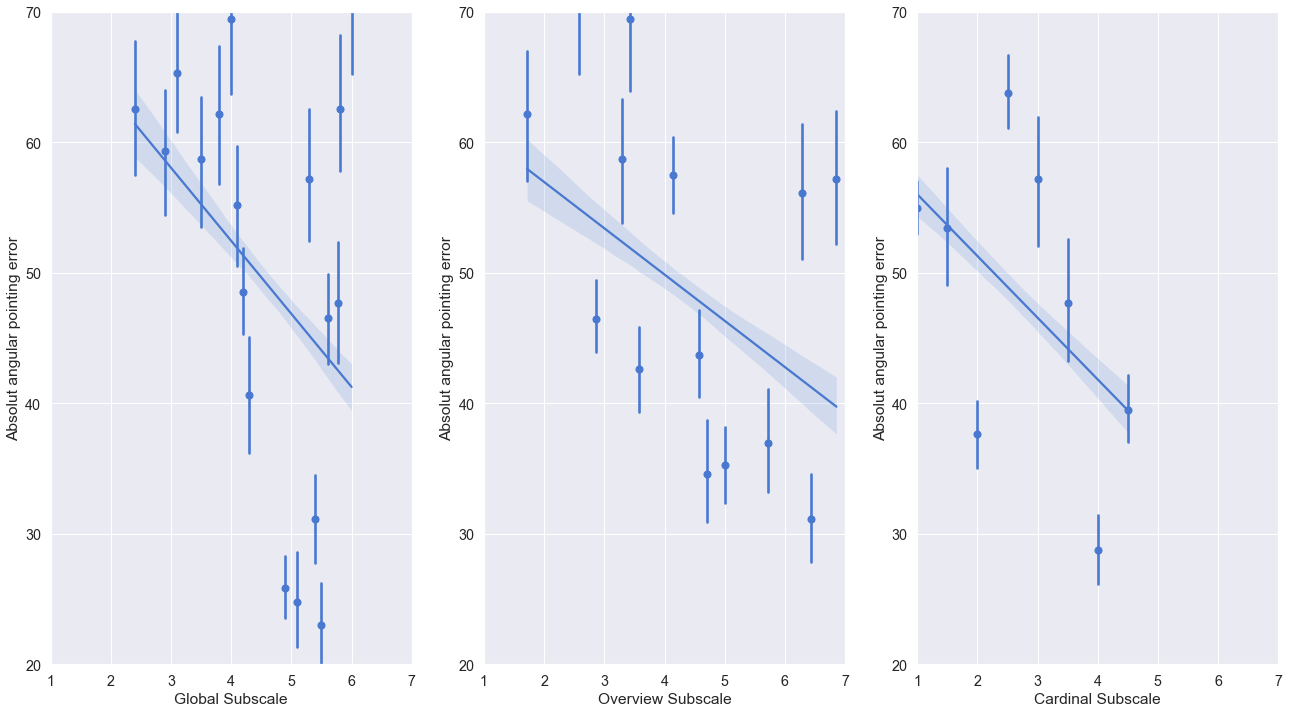

In [42]:
fig, axes = plt.subplots(1,3, figsize=(22,12))

sns.regplot(data=HumanAf, x='Global', y='AbsolutError',  x_bins=23, ax=axes[0]).set(xlabel='Global Subscale')
sns.regplot(data=HumanAf, x='Overview', y='AbsolutError', x_bins=23, ax=axes[1]).set(xlabel='Overview Subscale')
sns.regplot(data=HumanAf, x='Cardinal', y='AbsolutError',  x_bins=23, ax=axes[2]).set(xlabel='Cardinal Subscale')

#axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45);
for ax in axes.ravel():
    ax.set_xlim(1, 7)
    ax.set_ylim(20,70)
    ax.set_ylabel('Absolut angular pointing error')

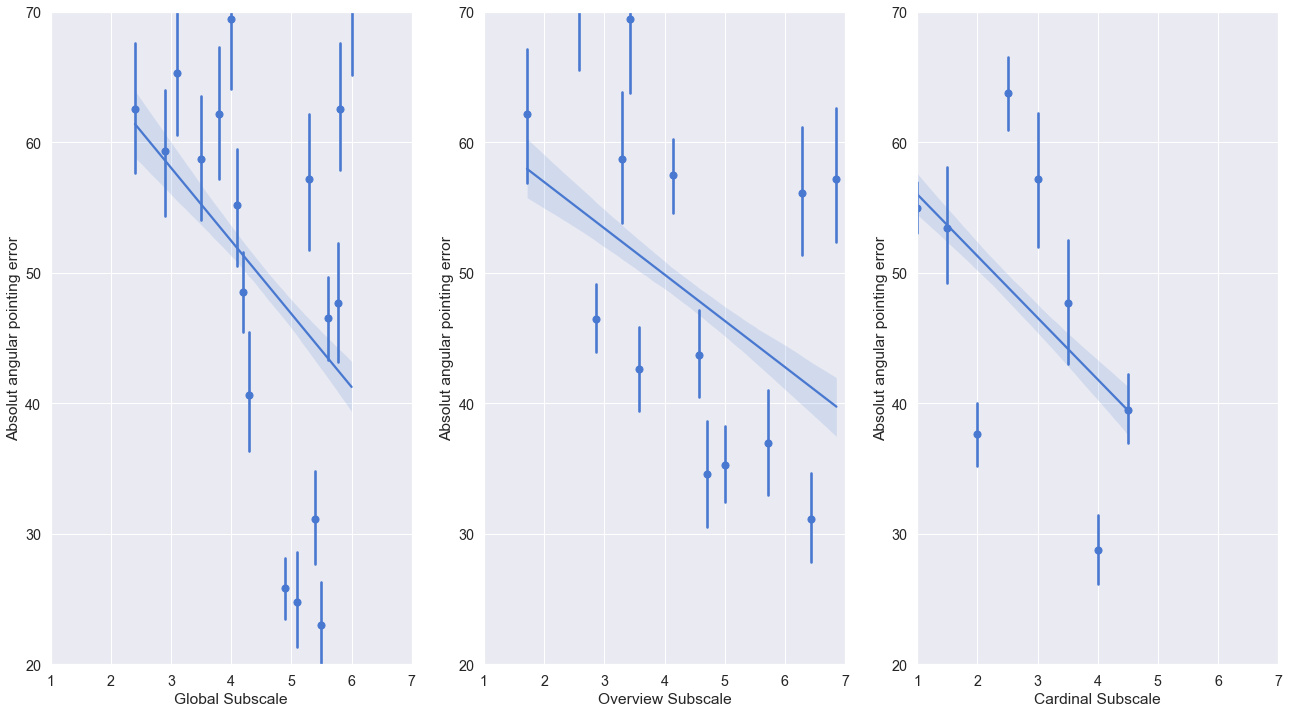

In [43]:
fig, axes = plt.subplots(1,3, figsize=(22,12))

sns.regplot(data=HumanAf, x='Global', y='AbsolutError',  x_bins=23, ax=axes[0]).set(xlabel='Global Subscale')
sns.regplot(data=HumanAf, x='Overview', y='AbsolutError', x_bins=23, ax=axes[1]).set(xlabel='Overview Subscale')
sns.regplot(data=HumanAf, x='Cardinal', y='AbsolutError',  x_bins=23, ax=axes[2]).set(xlabel='Cardinal Subscale')

#axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45);
for ax in axes.ravel():
    ax.set_xlim(1, 7)
    ax.set_ylim(20,70)
    ax.set_ylabel('Absolut angular pointing error')

In [44]:
#Mean absolut error by participant sorted from best to worst performer
absolut_error_mean_sorted = pd.DataFrame(HumanAf.groupby(['ID'])['AbsolutError'].mean().sort_values())
absolut_error_mean_sorted.reset_index(inplace=True)
absolut_error_mean_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID            22 non-null     category
 1   AbsolutError  22 non-null     float64 
dtypes: category(1), float64(1)
memory usage: 1.0 KB


In [45]:
FRS = pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/FRSsubs.csv')
FRS_merged = pd.merge(absolut_error_mean_sorted,FRS,on=['ID'])
FRS_merged = pd.merge(absolut_error_sorted,FRS_merged,on=['ID'])
FRS_merged.rename(columns={
    FRS_merged.columns[1]: 'Mean absolute pointing error',
    FRS_merged.columns[2]: 'Median of absolute pointing error'}, inplace=True)
FRS_merged.info()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tracysanchezpacheco/Documents/Resources/FRSsubs.csv'

[Text(0.5, 0, 'Cardinal Subscale')]

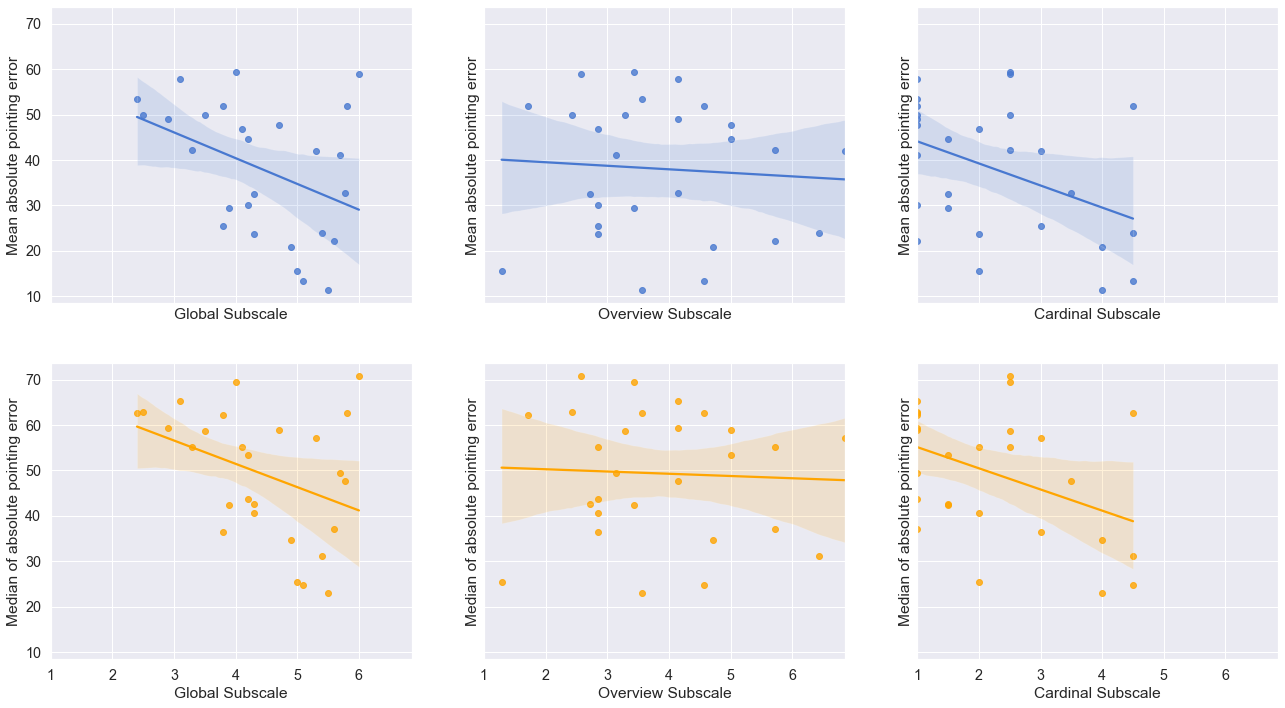

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(22,12), sharex=True, sharey=True)
sns.regplot(data=FRS_merged, x='Global', y='Mean absolute pointing error',  ax=axes[0,0]).set(xlabel='Global Subscale')
sns.regplot(data=FRS_merged, x='Overview', y='Mean absolute pointing error', ax=axes[0,1]).set(xlabel='Overview Subscale')
sns.regplot(data=FRS_merged, x='Cardinal', y='Mean absolute pointing error', ax=axes[0,2]).set(xlabel='Cardinal Subscale')
sns.regplot(data=FRS_merged, x='Global', y='Median of absolute pointing error', color='orange' ,  ax=axes[1,0]).set(xlabel='Global Subscale')
sns.regplot(data=FRS_merged, x='Overview', y='Median of absolute pointing error', color='orange',ax=axes[1,1]).set(xlabel='Overview Subscale')
sns.regplot(data=FRS_merged, x='Cardinal', y='Median of absolute pointing error',color='orange' , ax=axes[1,2]).set(xlabel='Cardinal Subscale')